In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

In [2]:
# names of features
features = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]

In [3]:
# Load data
df = pd.read_csv('data/diamonds.csv')

# Drop instance id column
df = df.drop(["Unnamed: 0"], axis=1)

# Create train test split for initial eda
training_data, testing_data = train_test_split(df, test_size = 0.3, random_state = 309)

# helper function for plotting distributions of features
def histplot(data, num_feat_index, cat_feat_index, ax):
    return sns.histplot(data, x = features[num_feat_index], kde=True,
                        hue = features[cat_feat_index], ax = ax, palette = 'Set2')

In [4]:
training_data.head()

carat        cut color clarity  depth  table     x     y     z  price
36878   0.42      Ideal     E     VS2   61.7   56.0  4.80  4.82  2.97    958
18820   1.03      Ideal     G    VVS1   61.7   56.0  6.45  6.56  4.00   7708
53406   0.82      Ideal     E     SI2   62.1   55.0  6.04  6.01  3.74   2668
25954   1.40      Ideal     G    VVS1   60.8   57.0  7.21  7.23  4.39  15134
13825   1.00  Very Good     E     VS2   63.5   56.0  6.37  6.32  4.03   5633

In [5]:
training_data.describe()

carat         depth         table             x             y  \
count  37758.000000  37758.000000  37758.000000  37758.000000  37758.000000   
mean       0.798166     61.741557     57.458660      5.733020      5.737242   
std        0.472857      1.426374      2.240281      1.120184      1.152877   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.720000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  37758.000000  37758.000000  
mean       3.539638   3930.603130  
std        0.708507   3973.019456  
min        0.000000    327.000000  
25%        2.910000    953.000000  
50%        3.530000   2409.000000  
75%        4.040000   5330.000000  
max       31.800000  18823.000000

In [6]:
training_data.duplicated().sum()

74

In [7]:
training_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
numeric_data = training_data.drop(labels = ['cut', 'color', 'clarity'], axis = 1)
numeric_data

carat  depth  table     x     y     z  price
36878   0.42   61.7   56.0  4.80  4.82  2.97    958
18820   1.03   61.7   56.0  6.45  6.56  4.00   7708
53406   0.82   62.1   55.0  6.04  6.01  3.74   2668
25954   1.40   60.8   57.0  7.21  7.23  4.39  15134
13825   1.00   63.5   56.0  6.37  6.32  4.03   5633
...      ...    ...    ...   ...   ...   ...    ...
33475   0.32   61.5   56.0  4.42  4.40  2.71    828
9617    1.33   61.3   59.0  7.06  6.93  4.29   4634
5089    1.02   65.5   59.0  6.27  6.24  4.10   3754
45319   0.32   63.5   56.0  4.34  4.38  2.77    524
14241   1.11   63.1   56.0  6.59  6.63  4.17   5769

[37758 rows x 7 columns]

In [9]:
numeric_data.skew(axis = 0)

carat    1.115709
depth   -0.174914
table    0.827762
x        0.372581
y        3.229834
z        2.002532
price    1.613360
dtype: float64

In [10]:
numeric_data.kurtosis(axis = 0)

carat      1.306816
depth      5.938881
table      3.493664
x         -0.614729
y        125.733270
z         66.397789
price      2.172815
dtype: float64

In [11]:
# numeric features to use with numerical_transformer
num_feats = ["carat", "depth", "table", "x", "y", "z", "price"]

#transformer for numeric variables
numerical_transformer = QuantileTransformer(output_distribution = 'normal', random_state = 309)

# Specifying order of ordinal variables
cut_transformer = OrdinalEncoder(categories = [["Ideal", "Premium", "Very Good", "Good", "Fair"]])
color_transformer = OrdinalEncoder(categories = [["D", "E", "F", "G", "H", "I", "J"]])
clarity_transformer = OrdinalEncoder(categories = [["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]])


# preproccessor to handle encoding of all independant variables
preprocessor = ColumnTransformer(
    transformers = [
        ("carat", numerical_transformer, ["carat"]),
        ("cut", cut_transformer, ["cut"]),
        ("color", color_transformer, ["color"]),
        ("clarity", clarity_transformer, ["clarity"]),
        ("num_trans", numerical_transformer, num_feats[1:])
    ]
)

transformed_data = pd.DataFrame(preprocessor.fit_transform(training_data), columns = features)

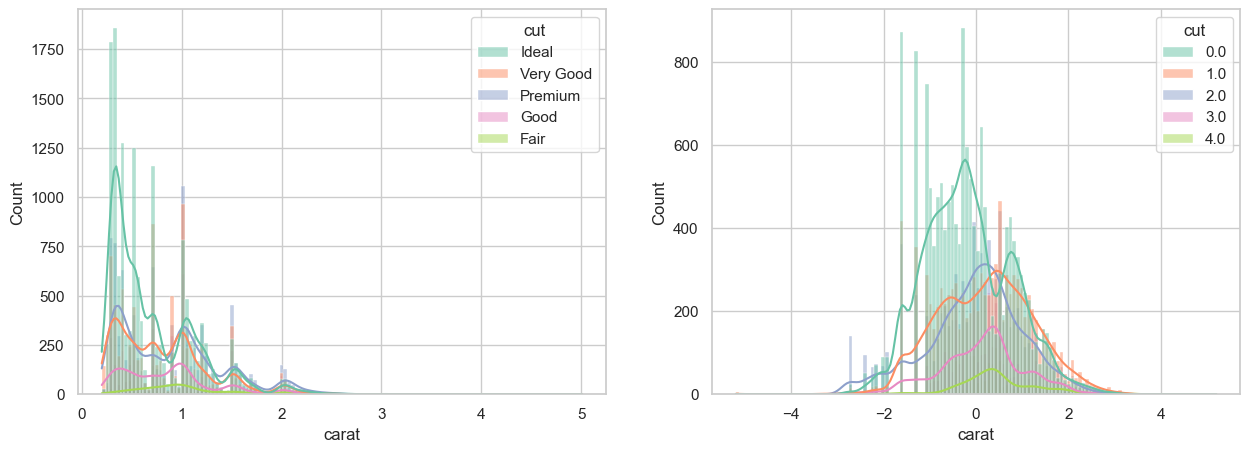

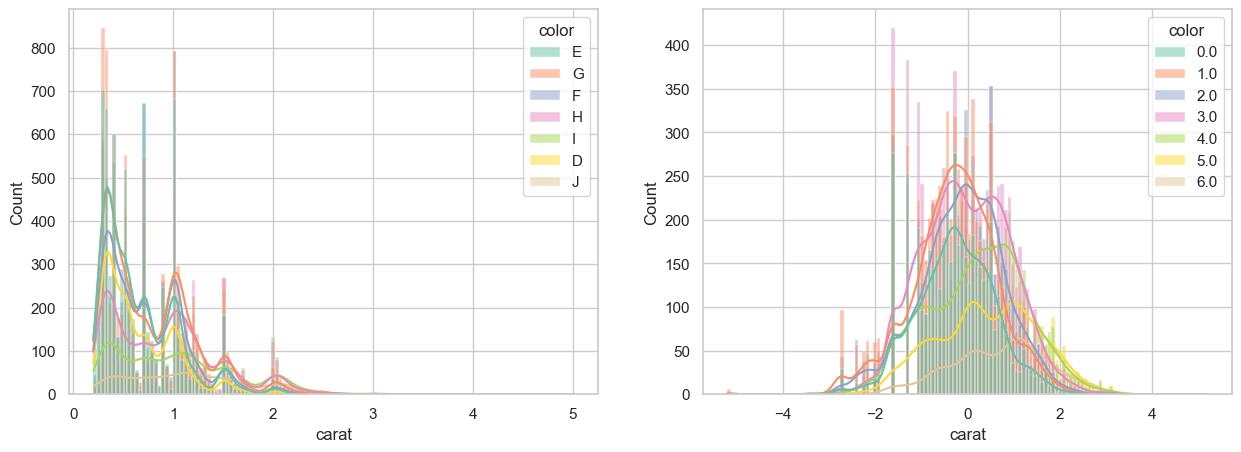

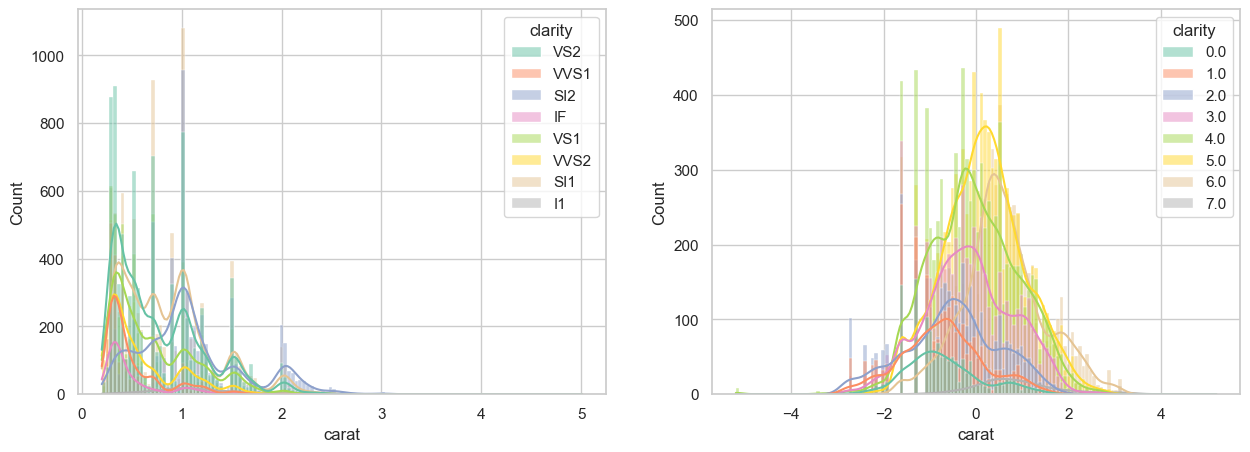

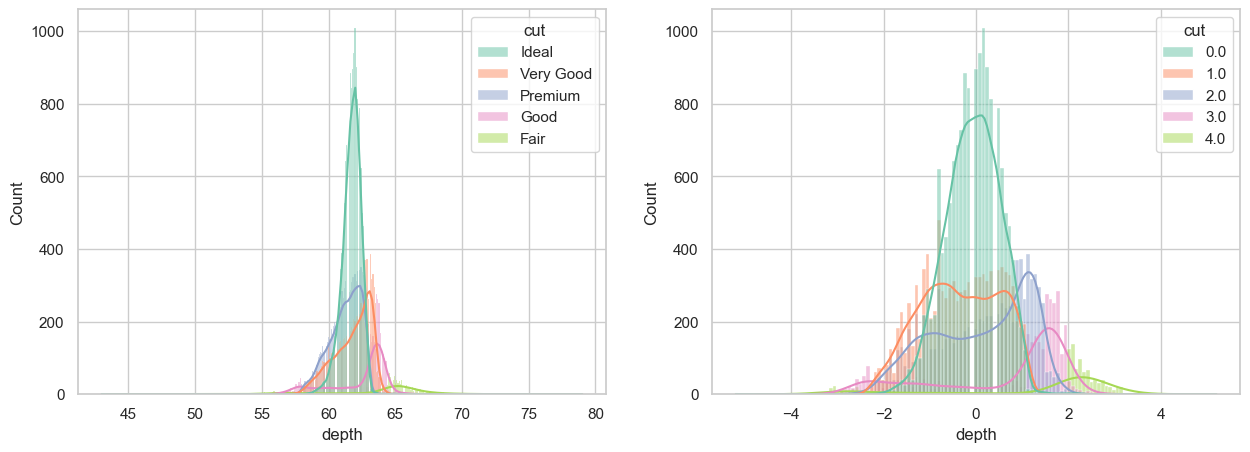

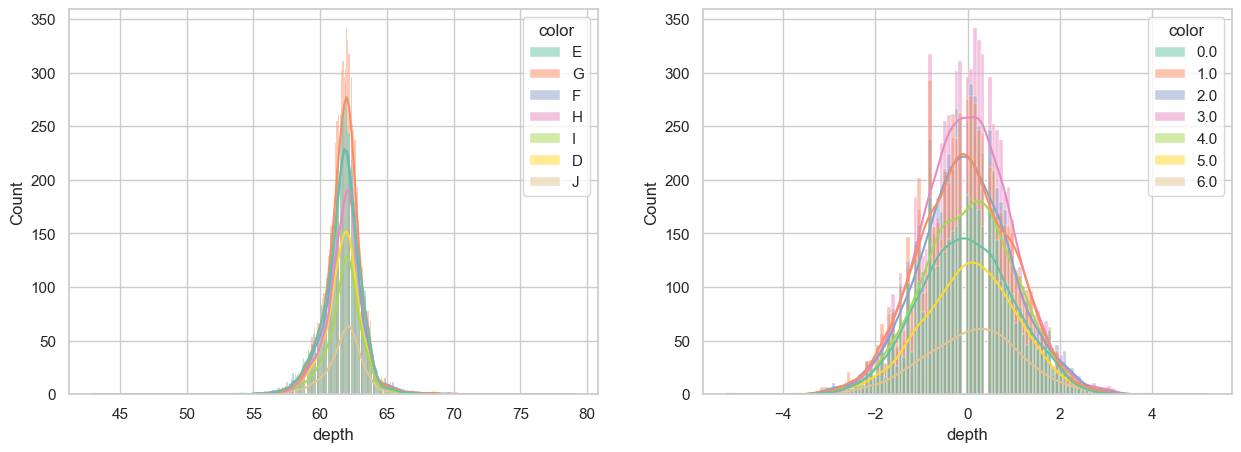

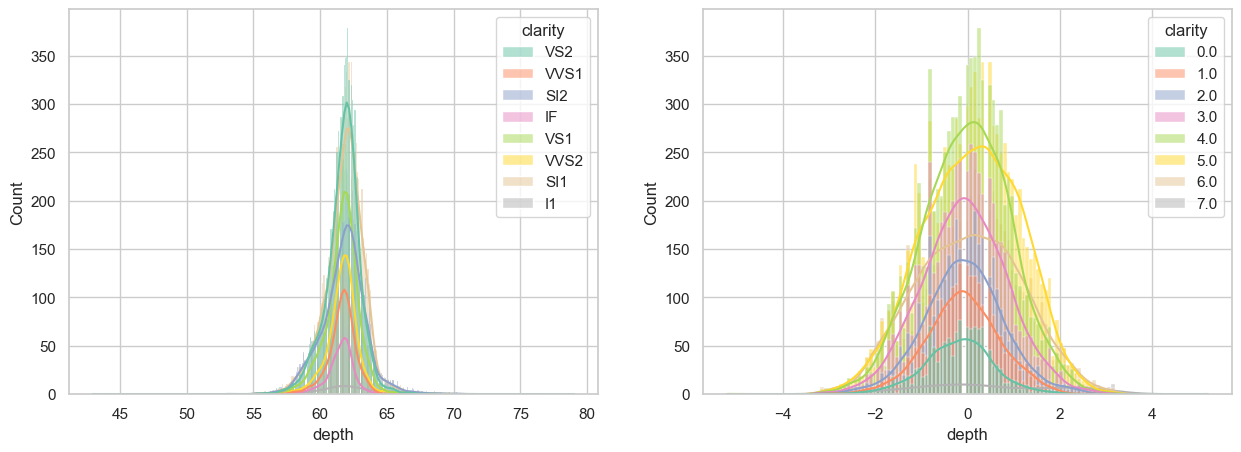

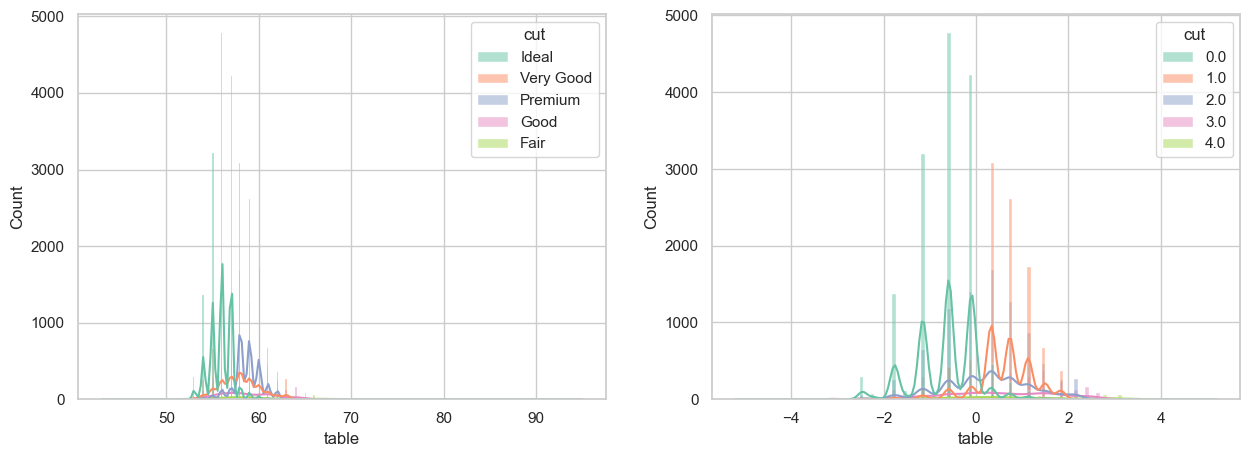

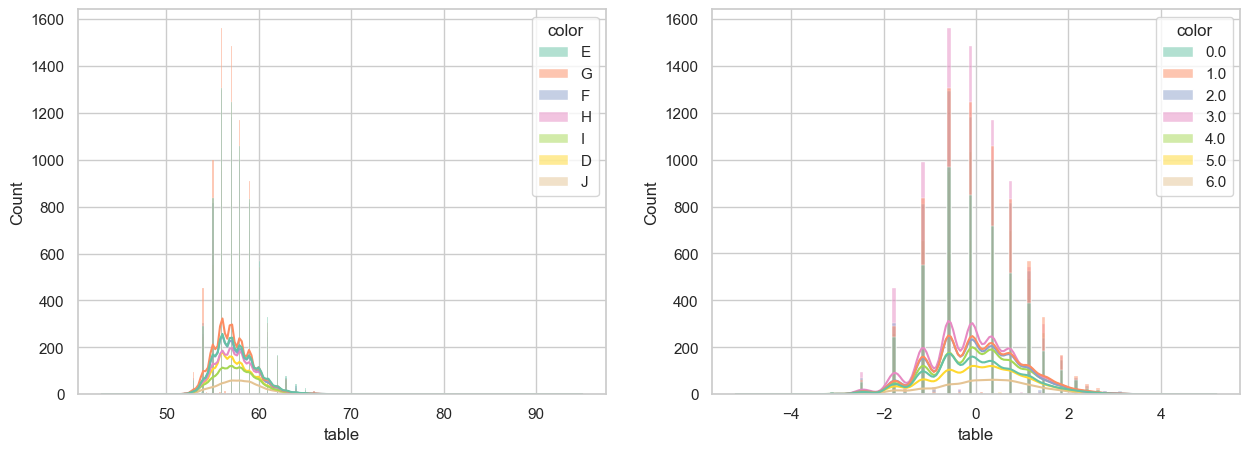

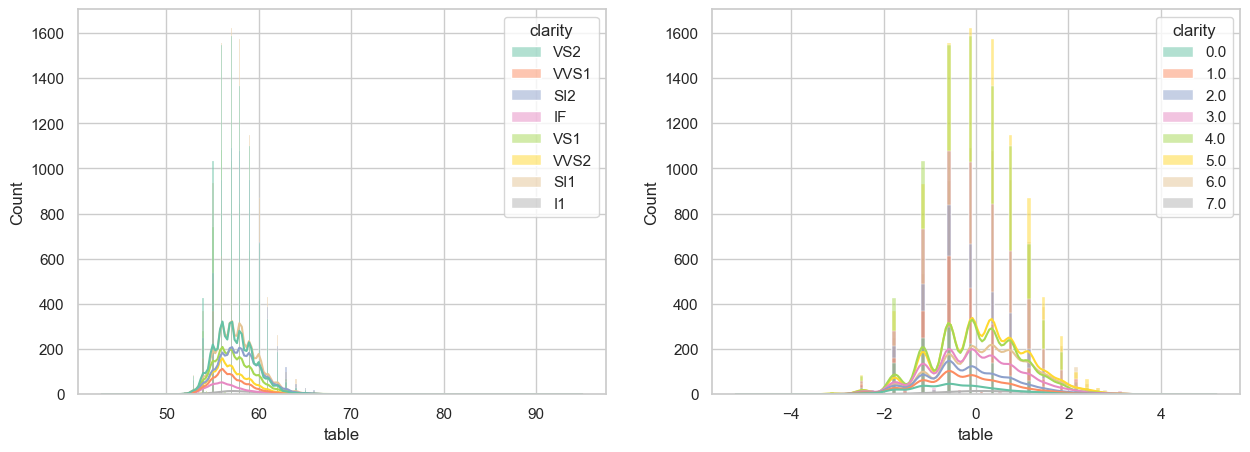

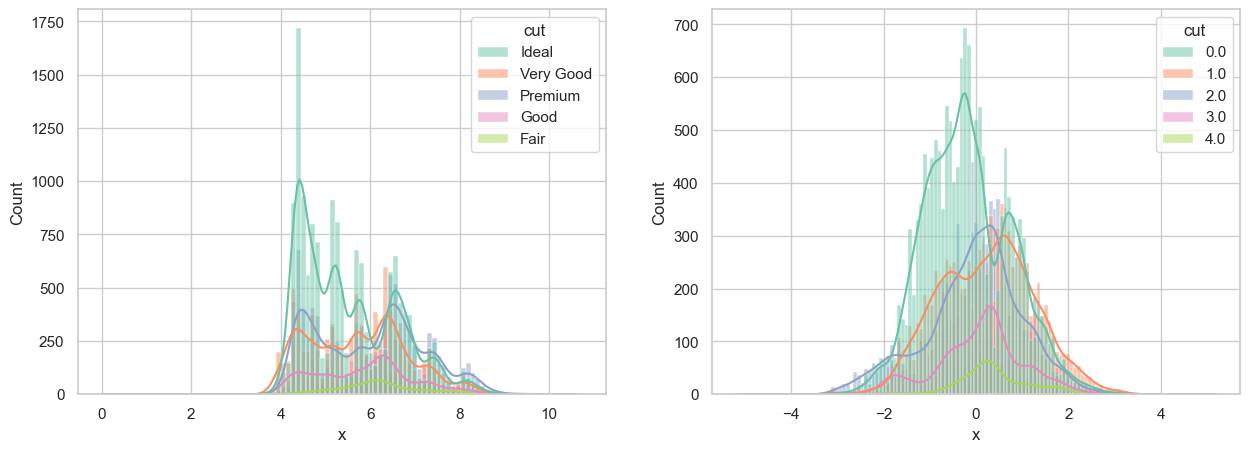

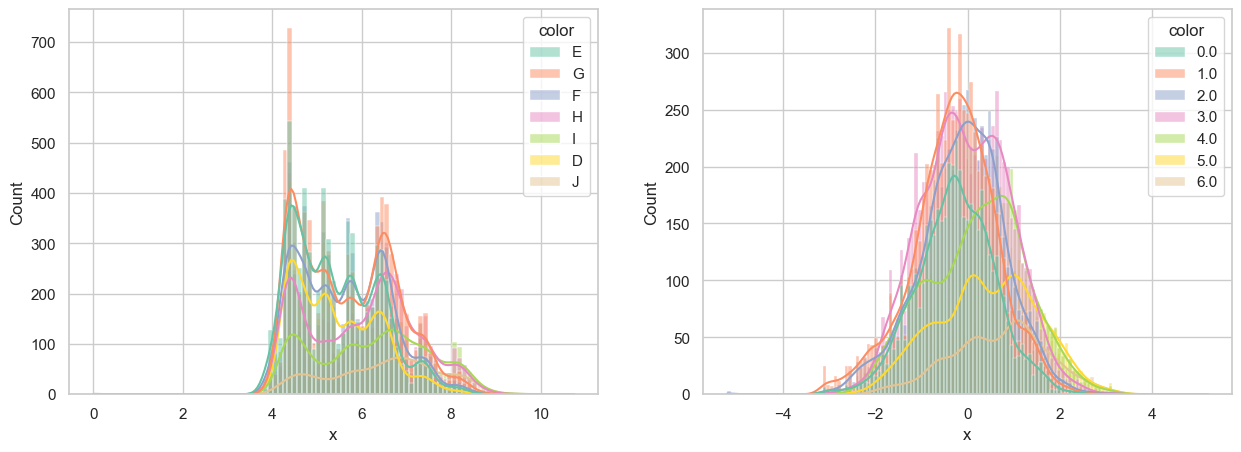

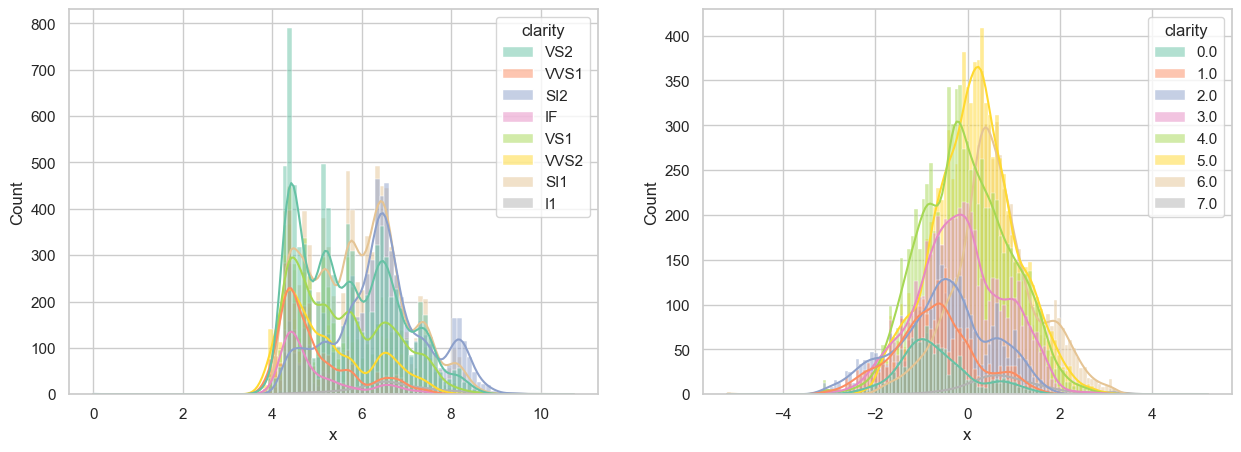

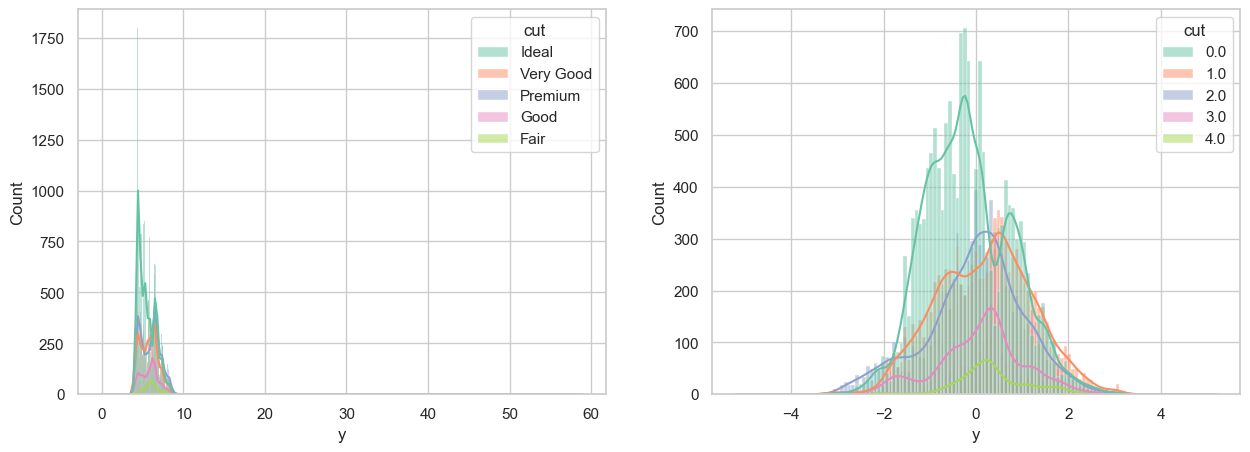

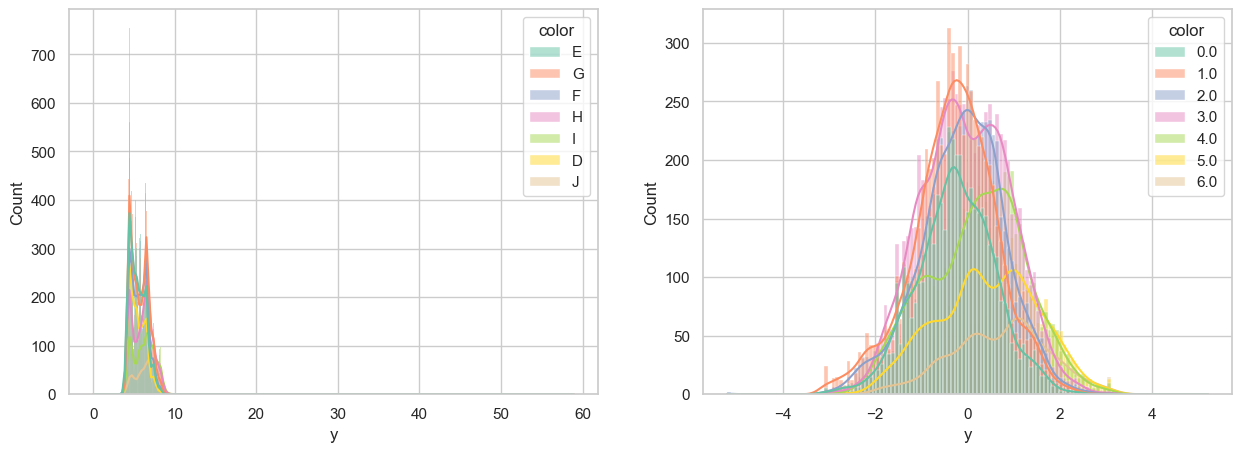

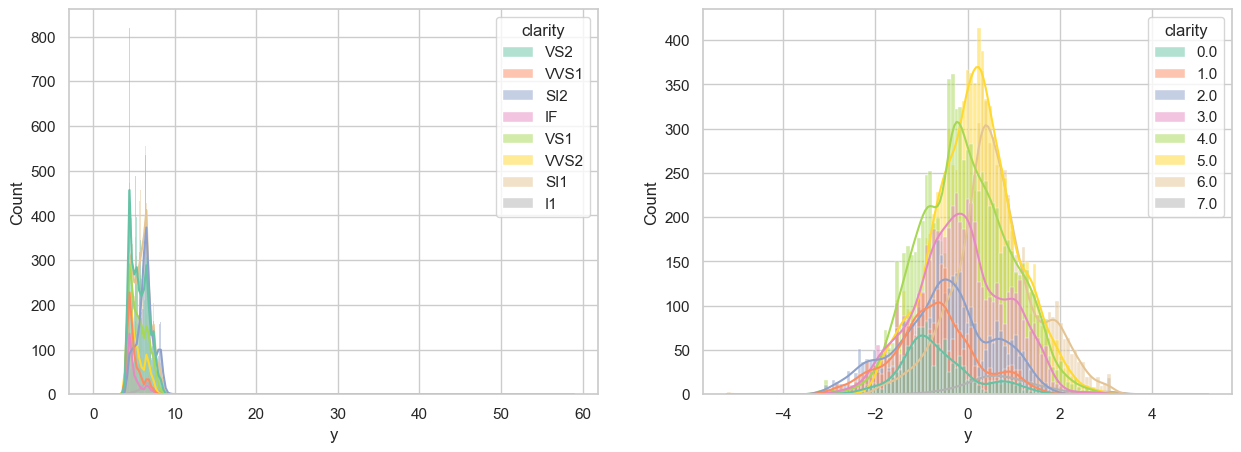

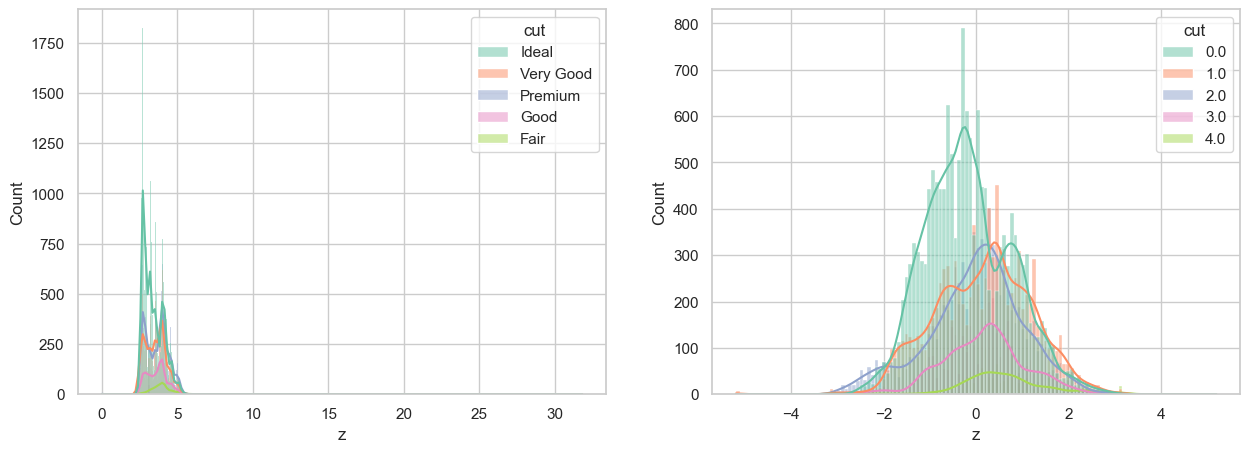

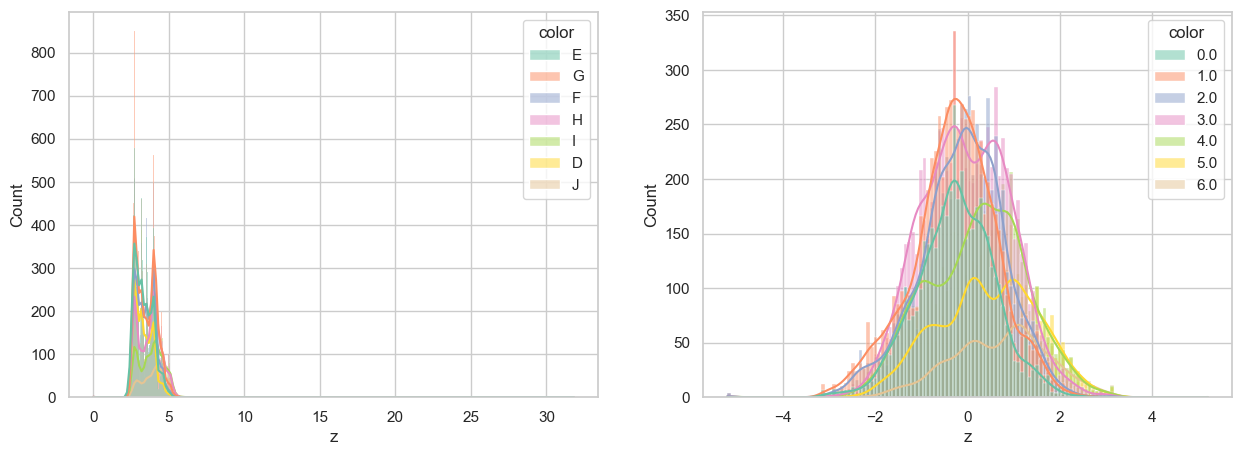

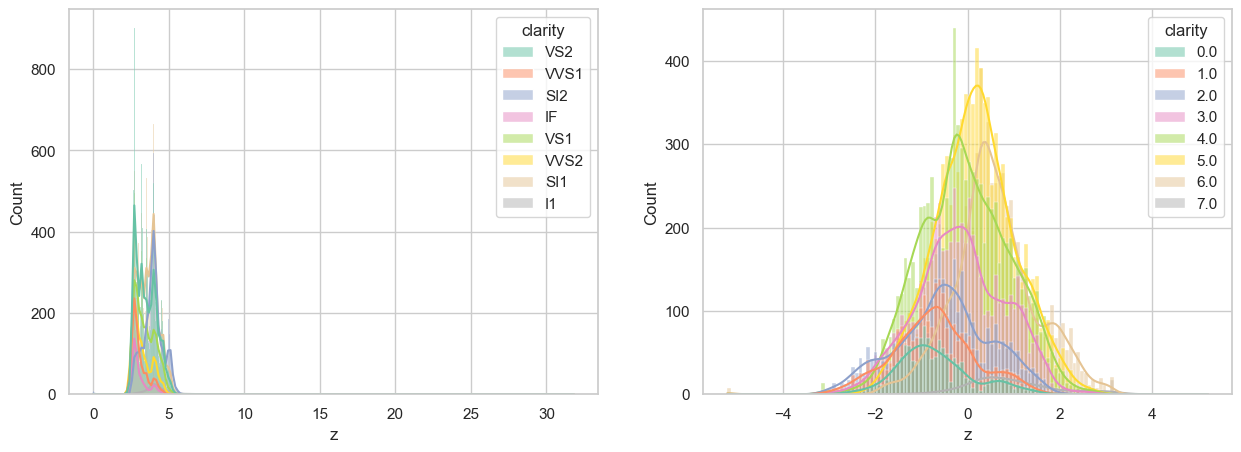

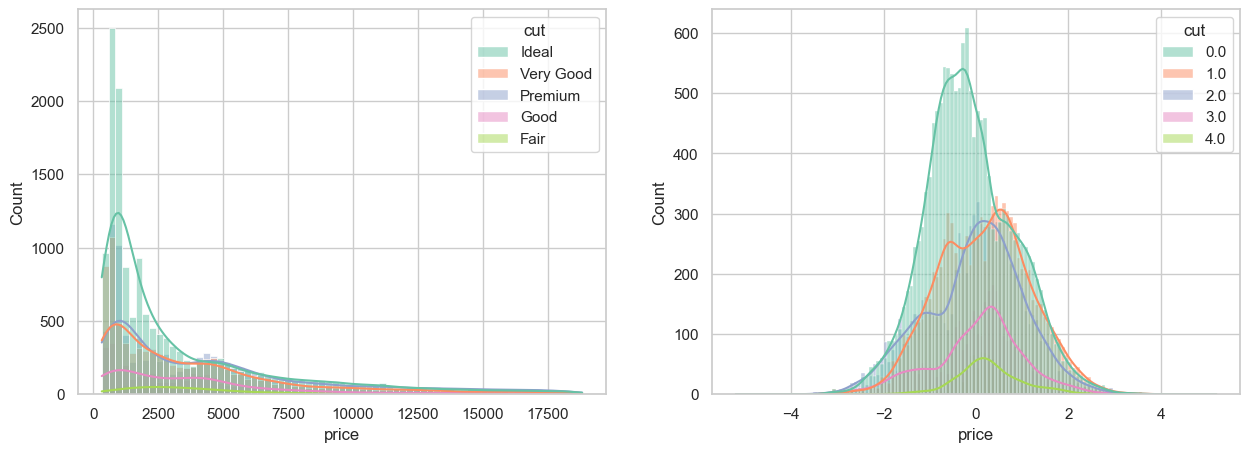

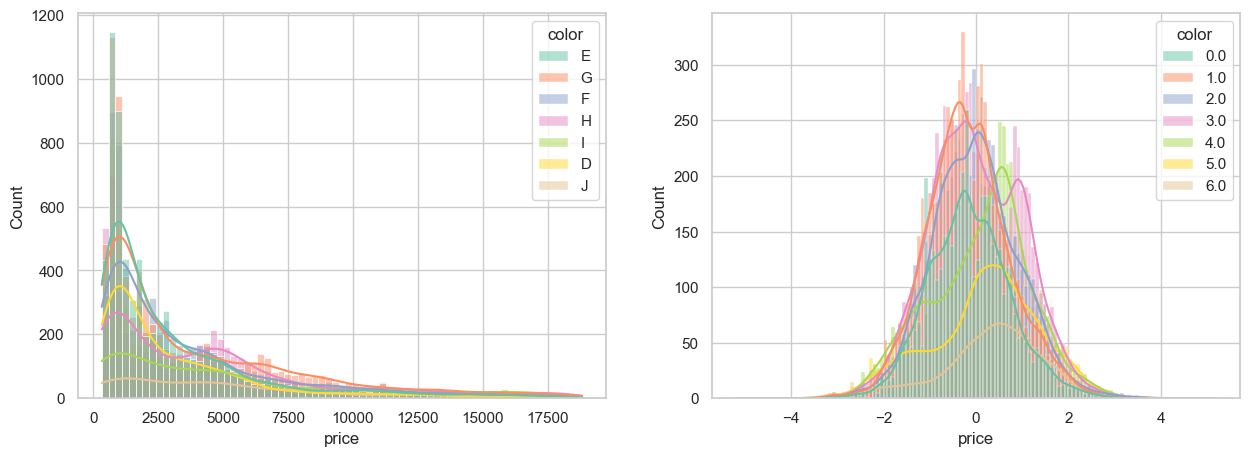

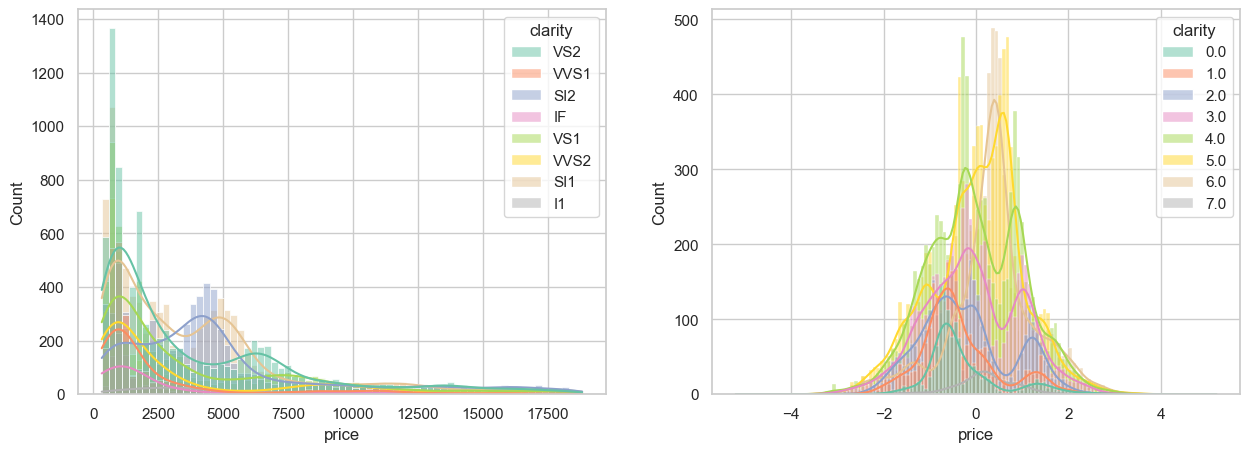

In [12]:
# show grid
sns.set_theme(style = 'whitegrid')

num_feat_indices = [0, 4, 5, 6, 7, 8, 9]
cat_feat_indices = [1, 2, 3]
# plotting distributions before and after applying the transformation
for i in num_feat_indices:
    for j in cat_feat_indices:
        fig, axs = plt.subplots(ncols = 2, figsize = (15, 5))
        histplot(training_data, i, j, axs[0])
        histplot(transformed_data, i, j, axs[1])
        plt.show()

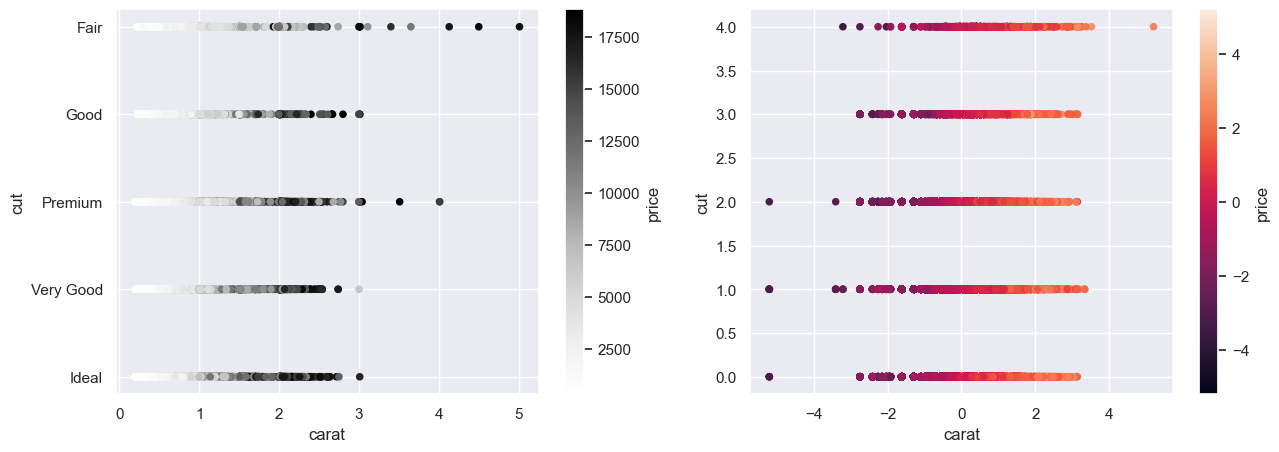

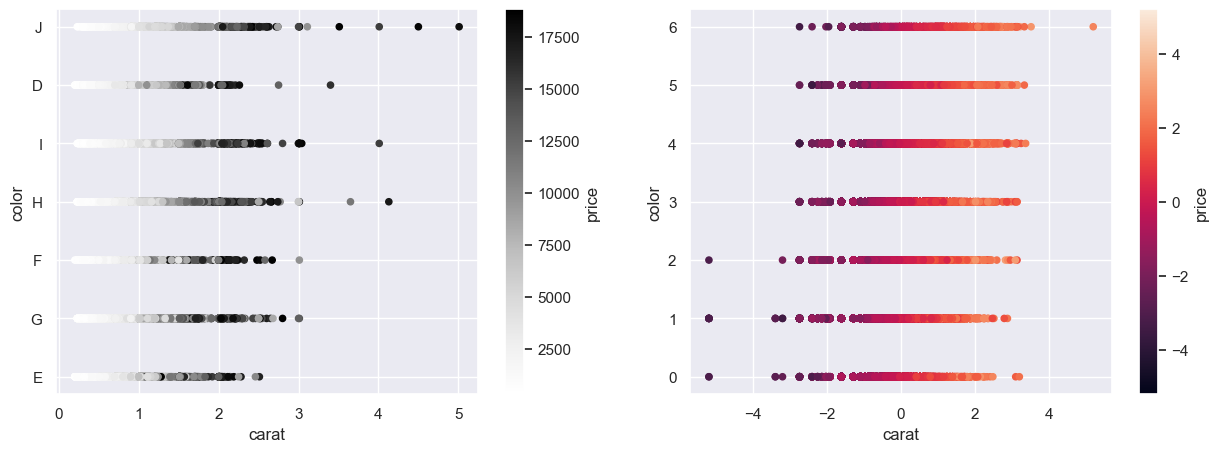

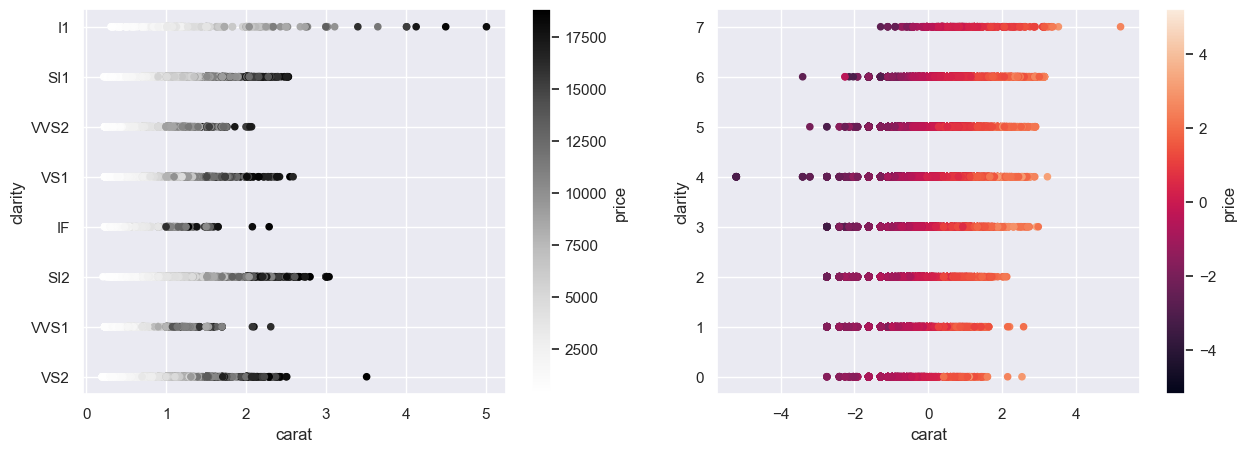

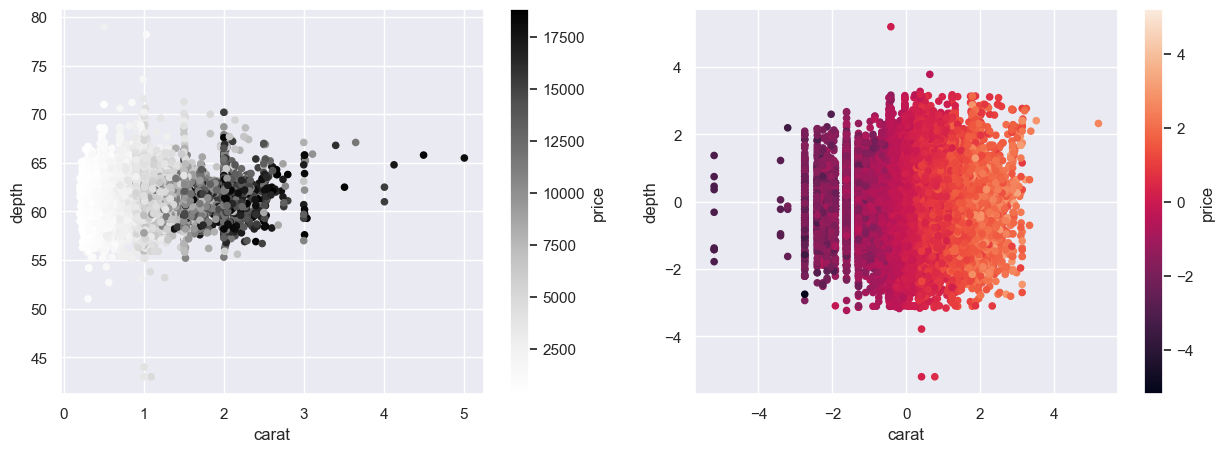

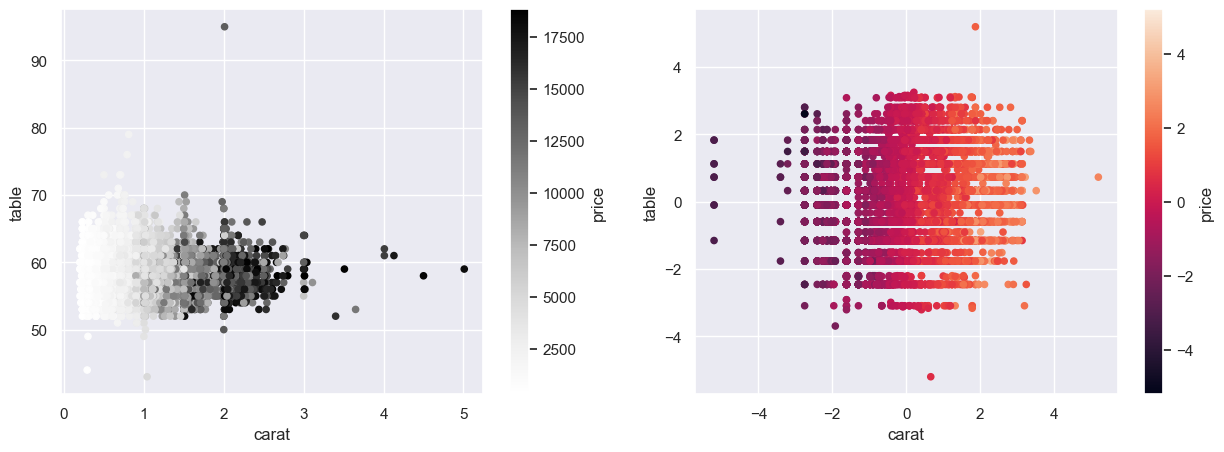

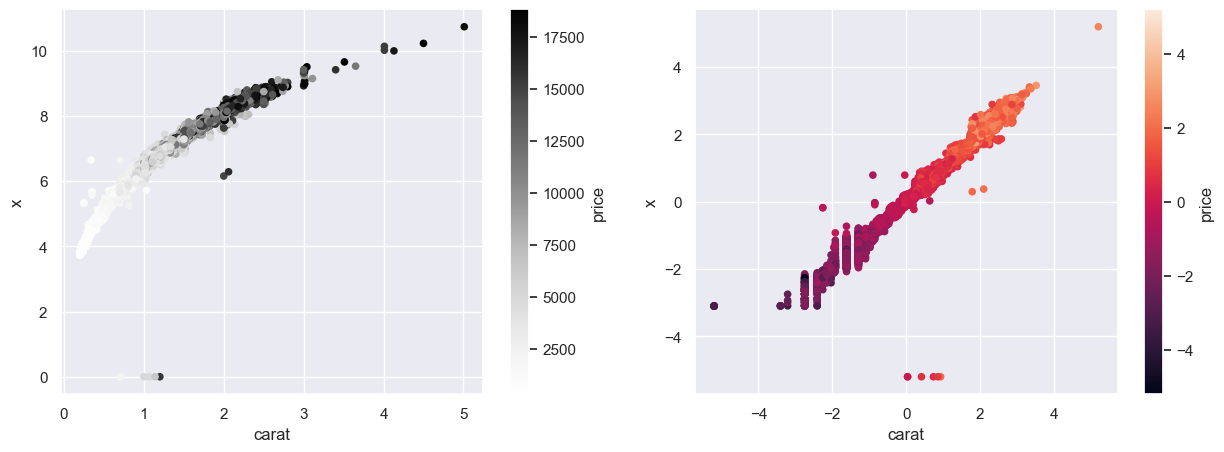

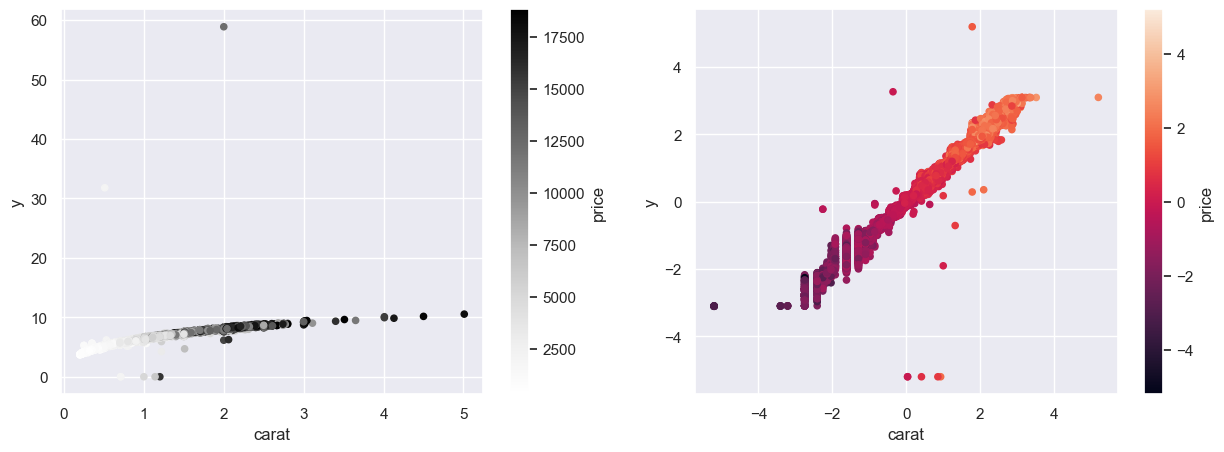

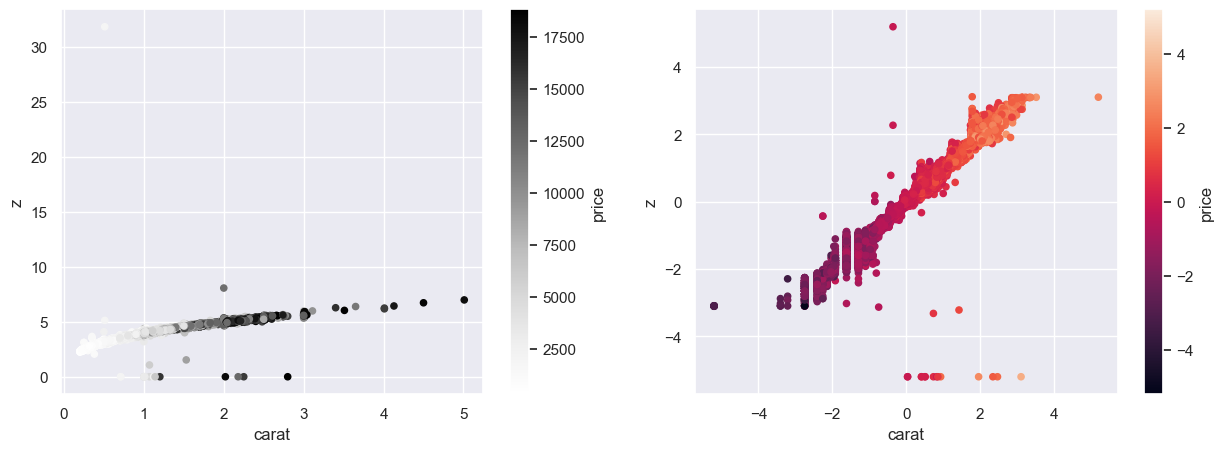

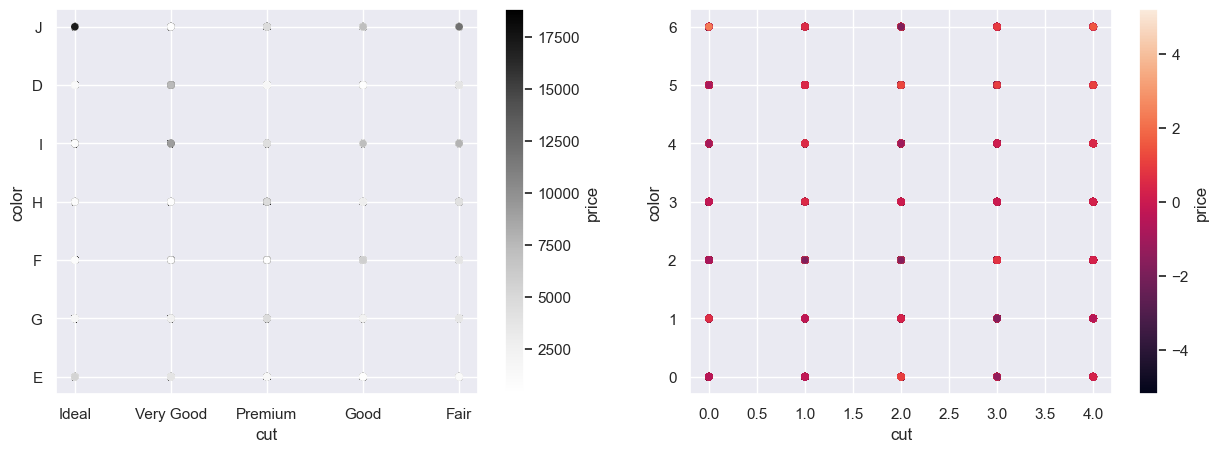

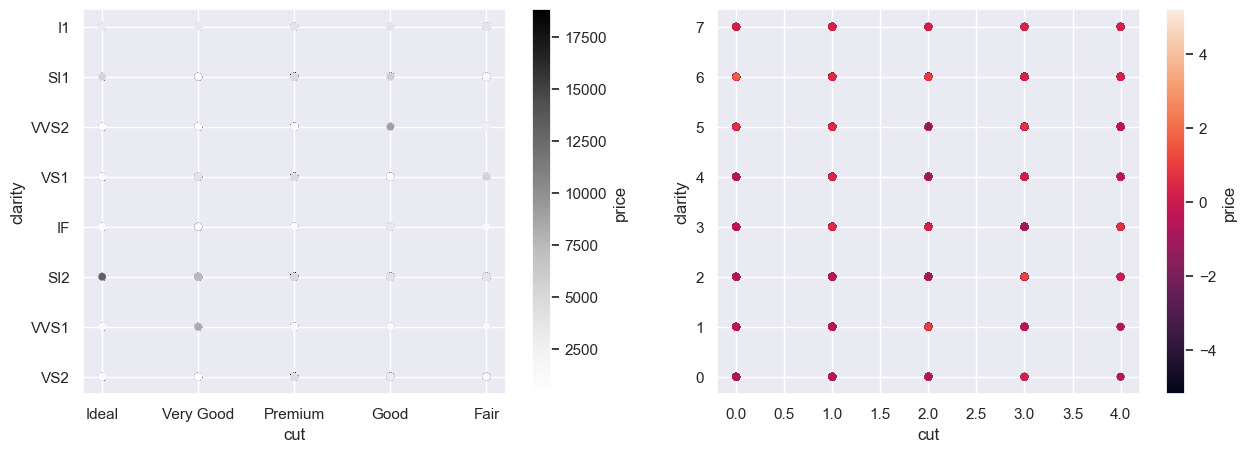

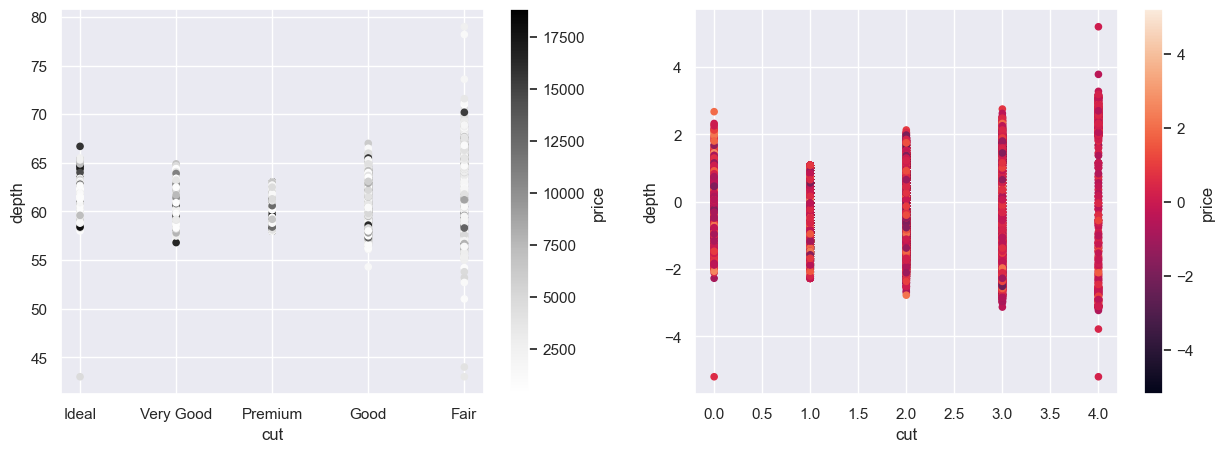

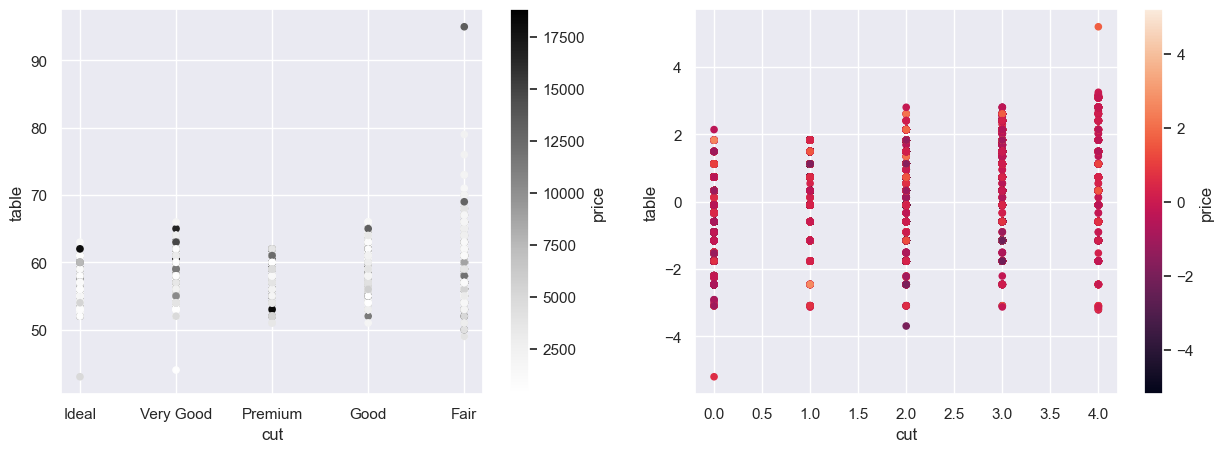

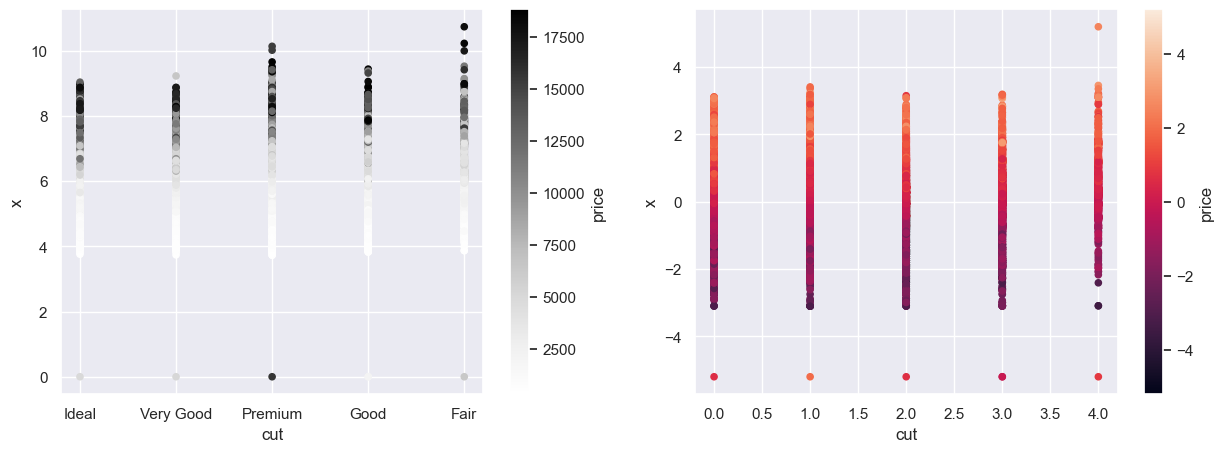

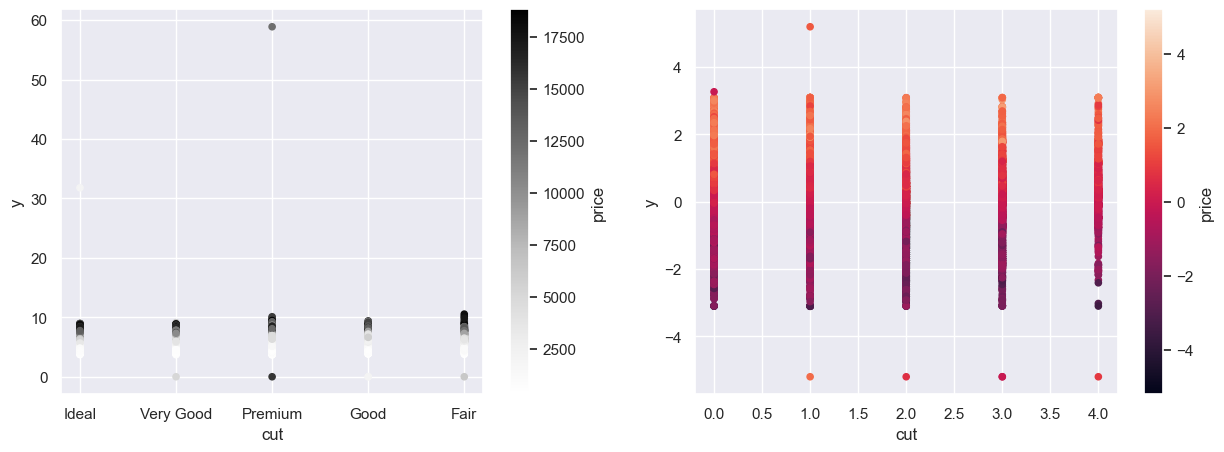

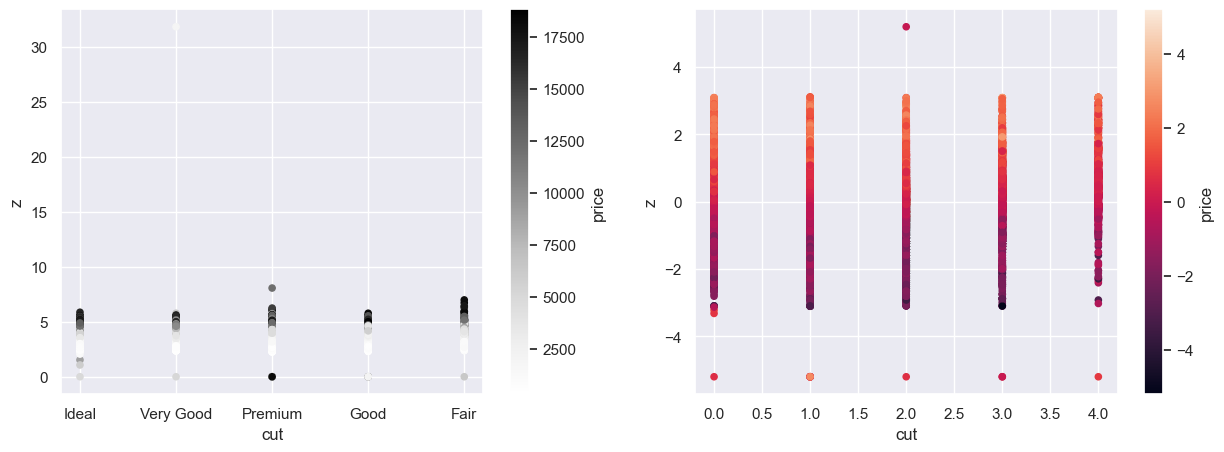

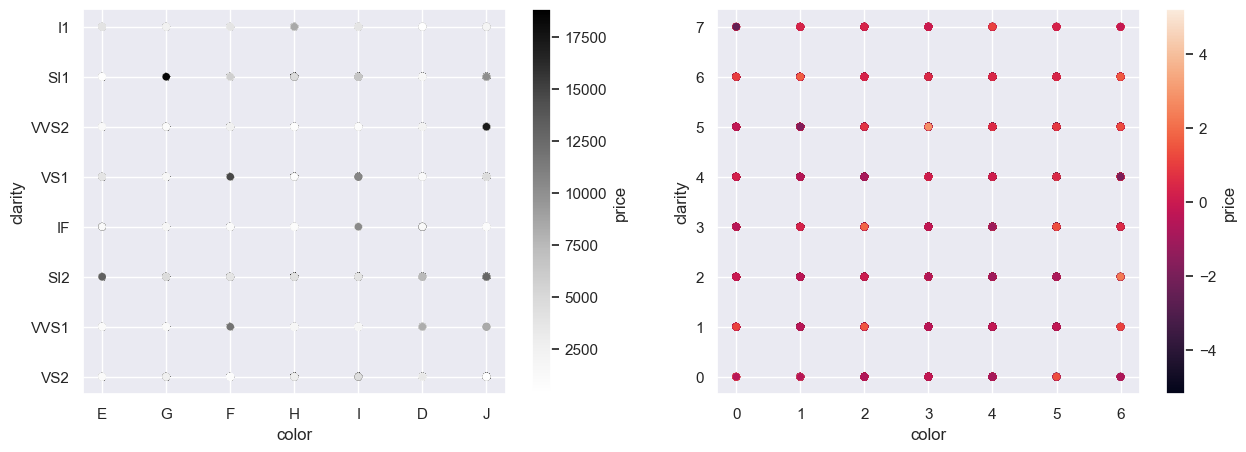

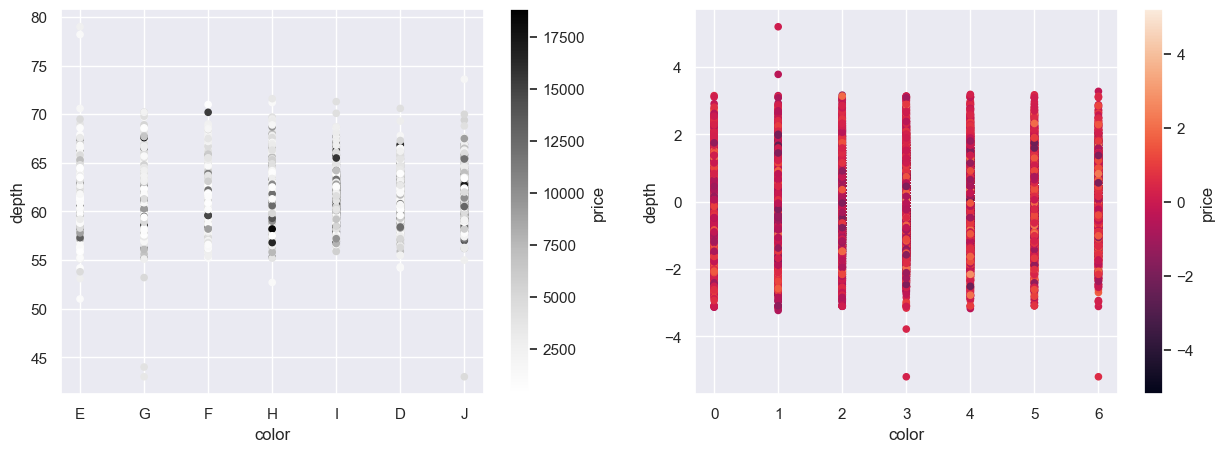

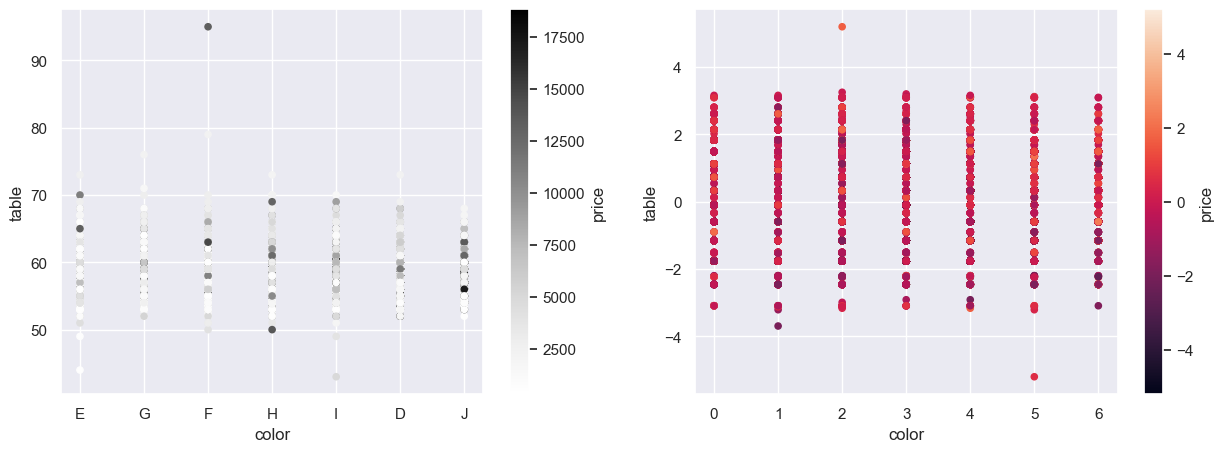

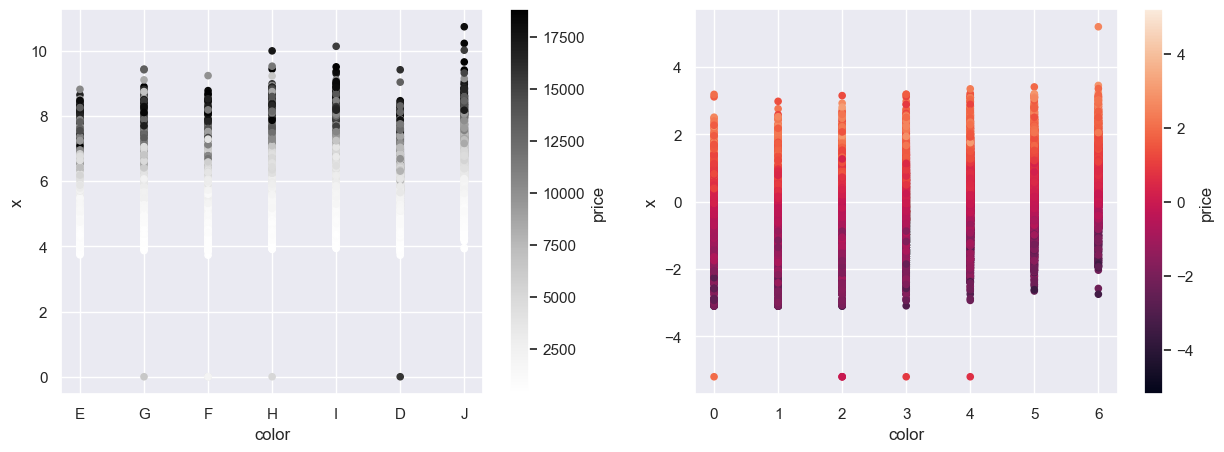

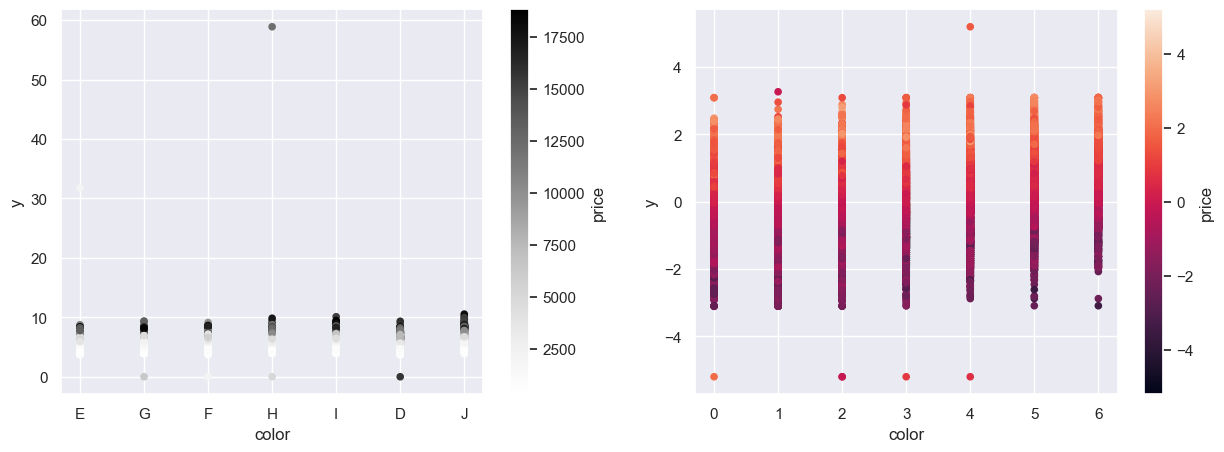

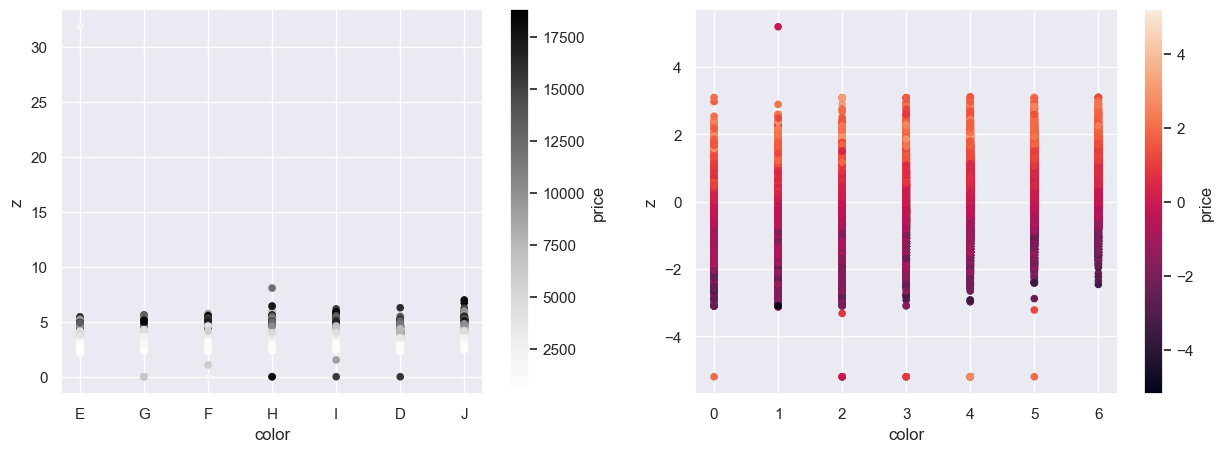

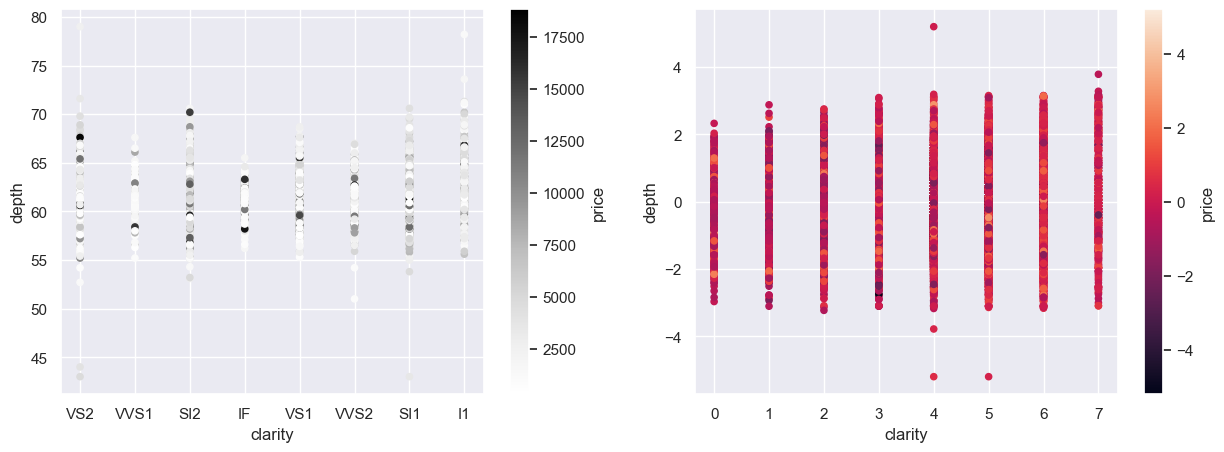

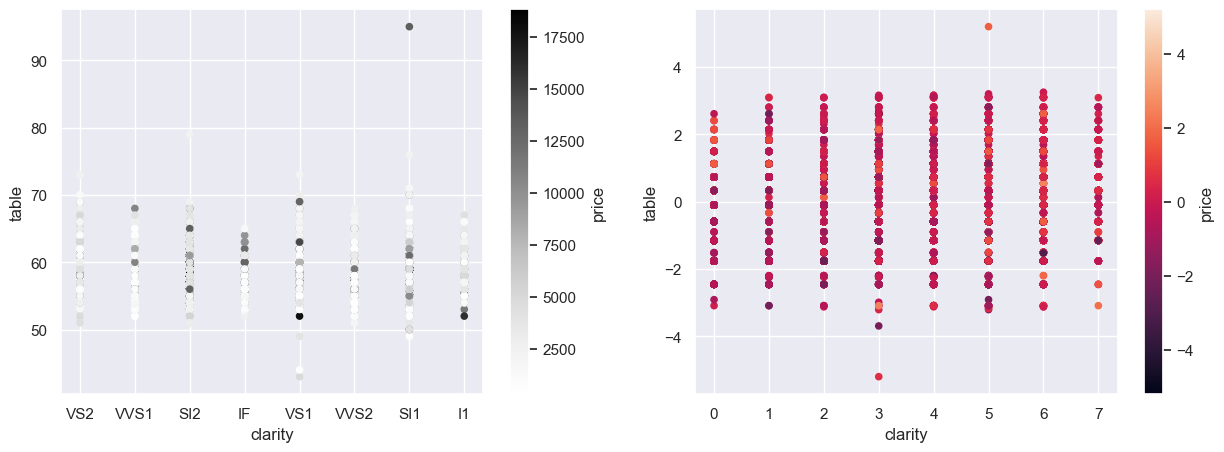

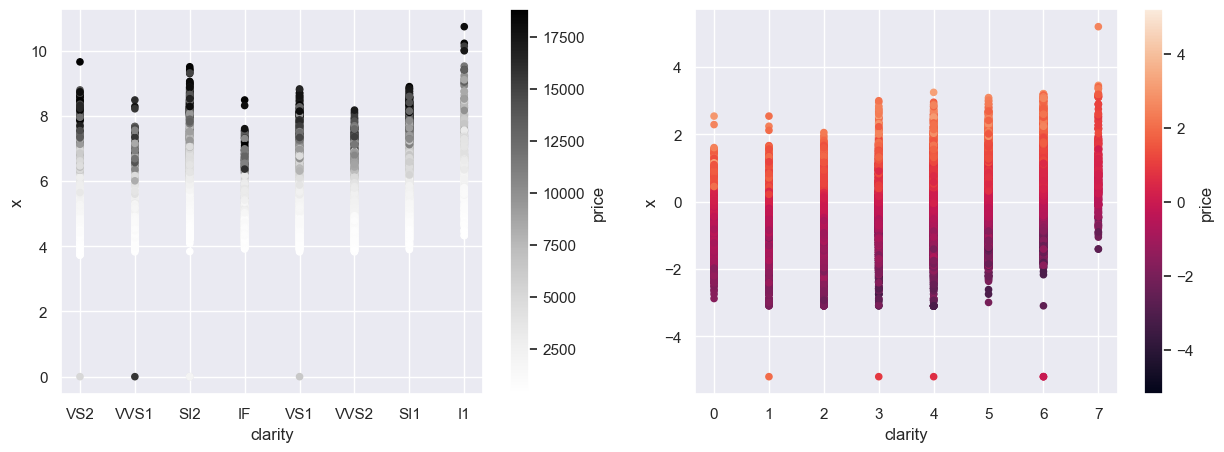

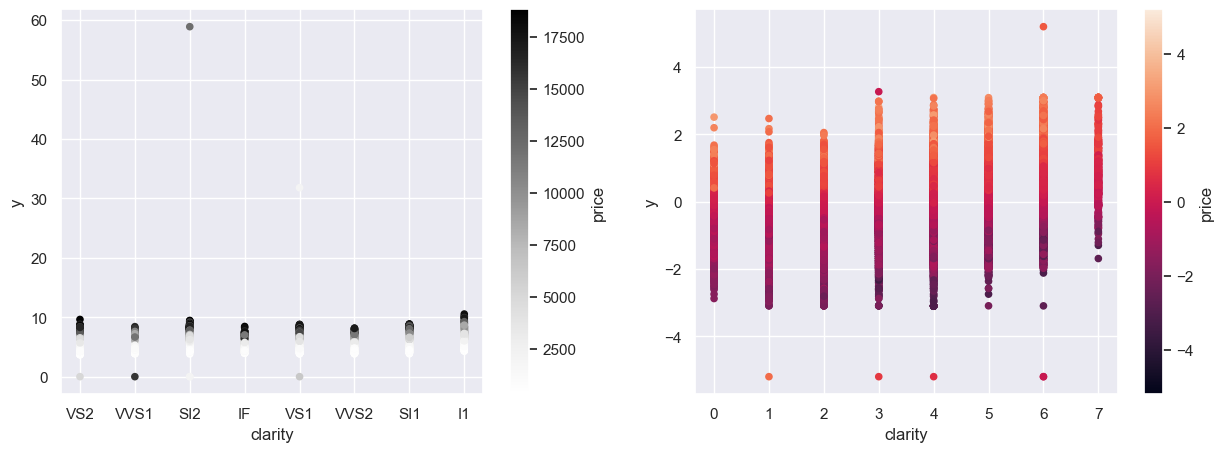

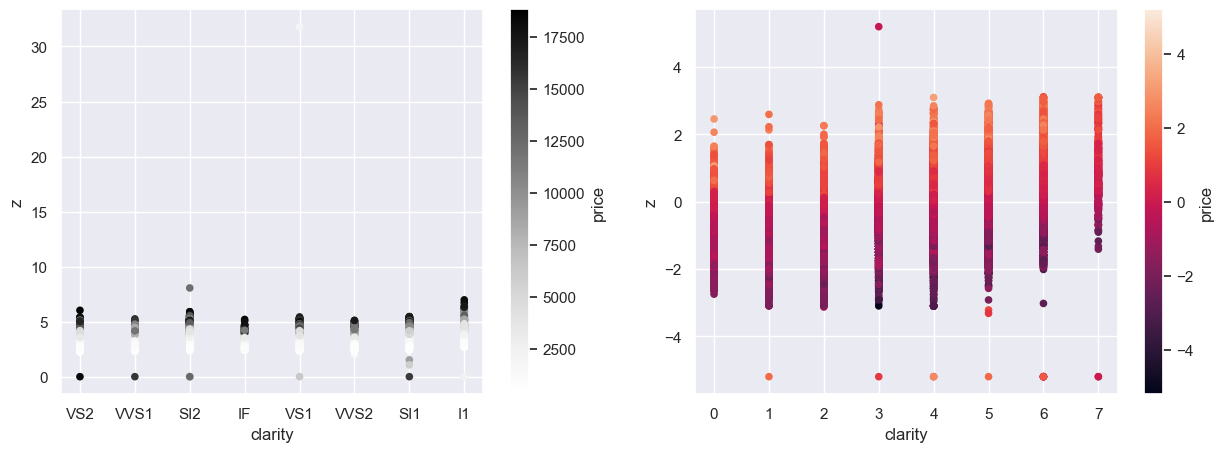

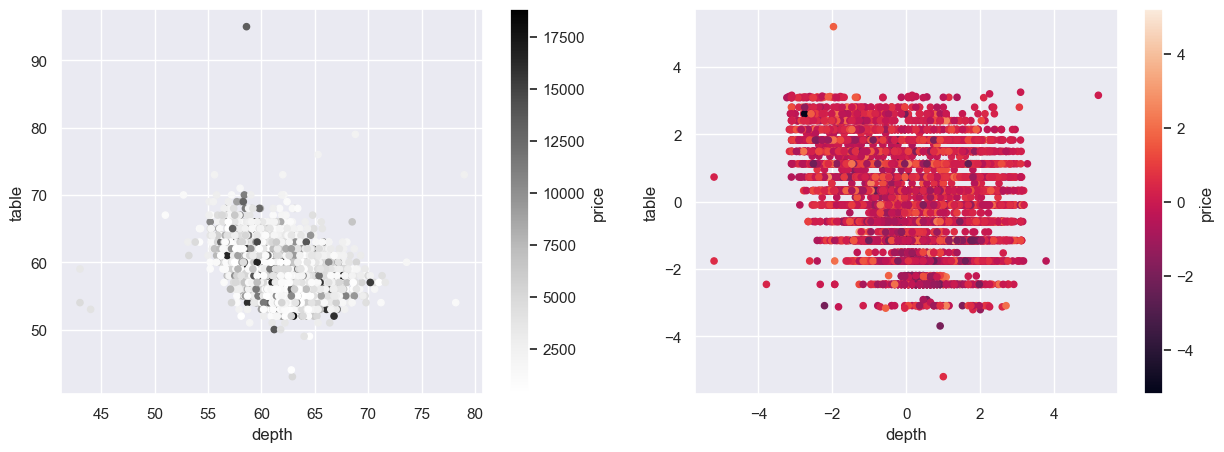

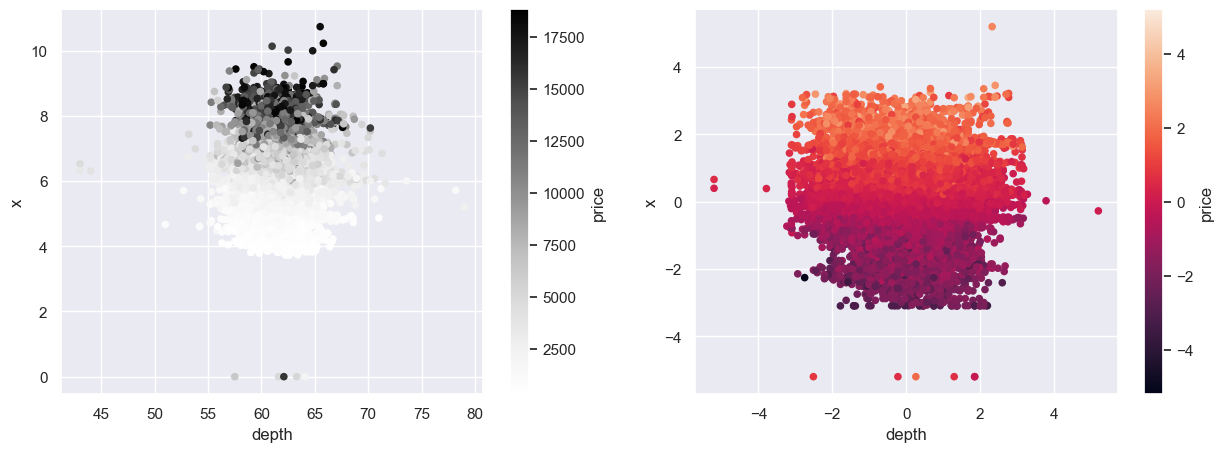

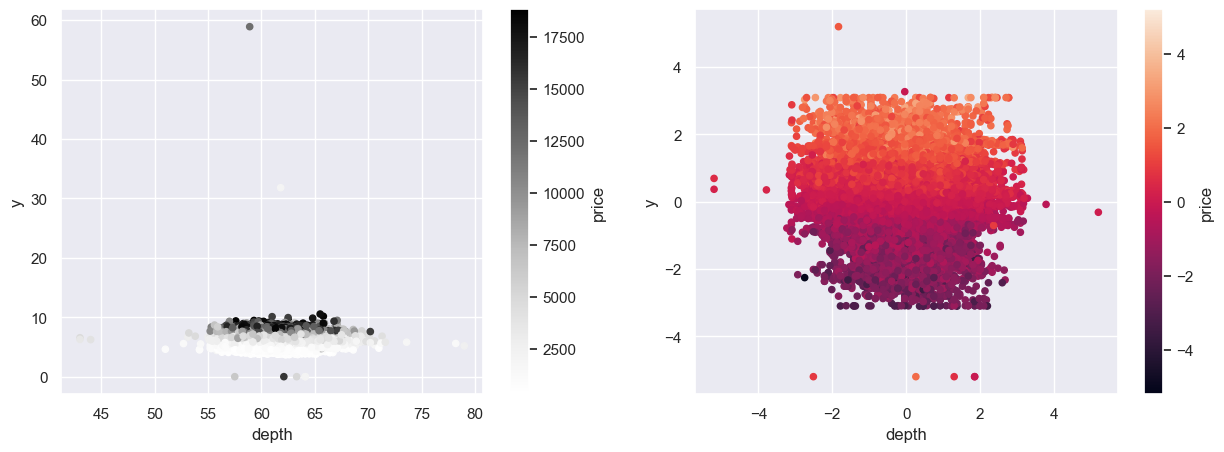

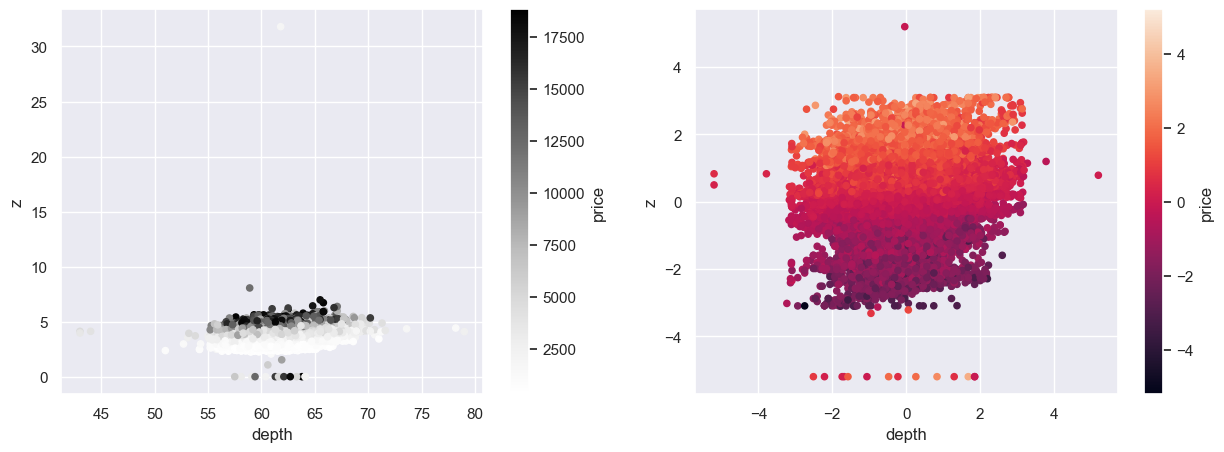

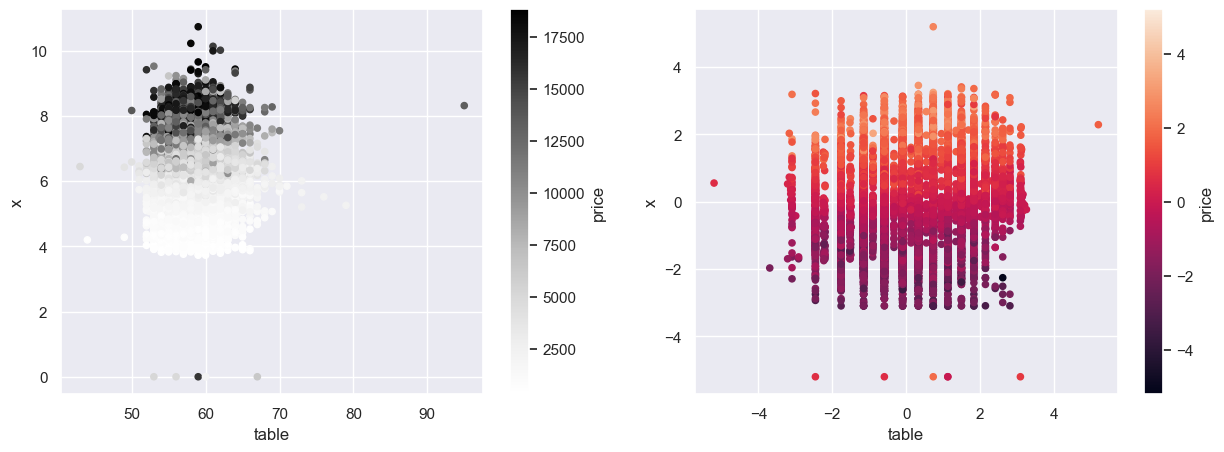

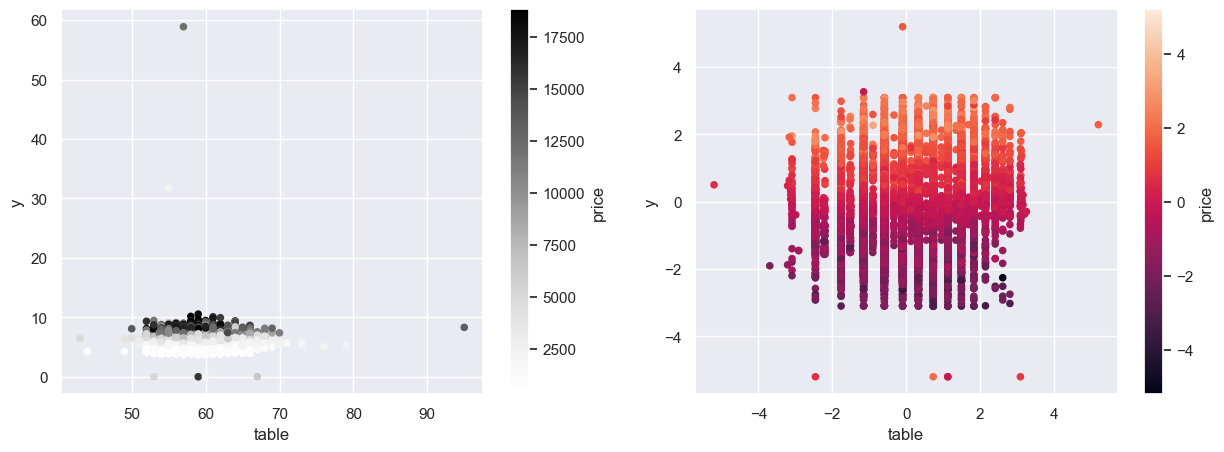

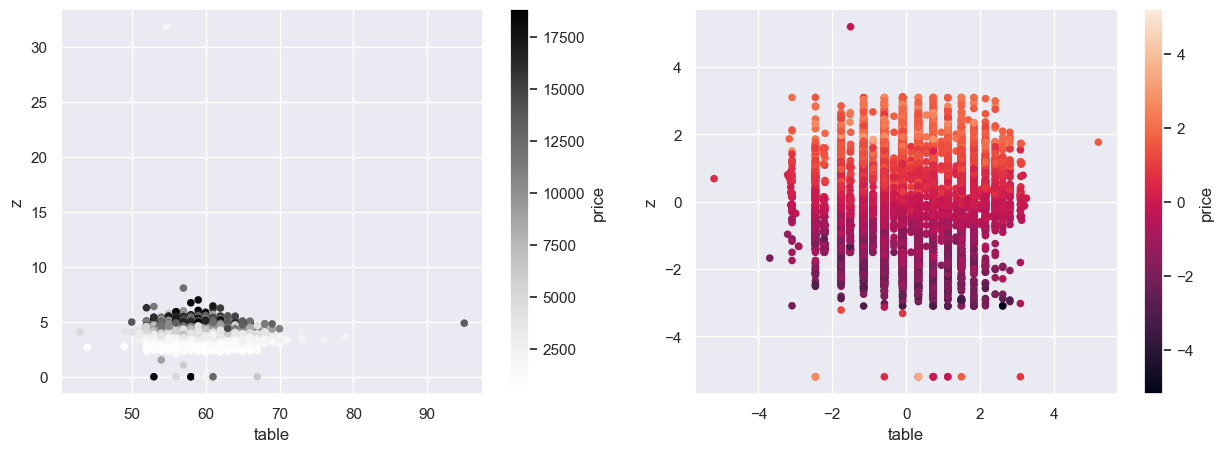

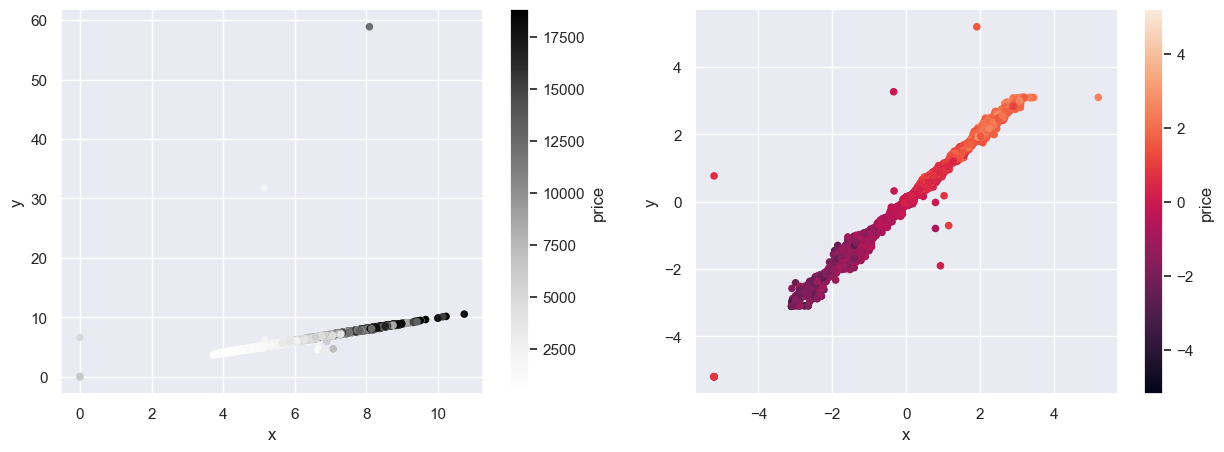

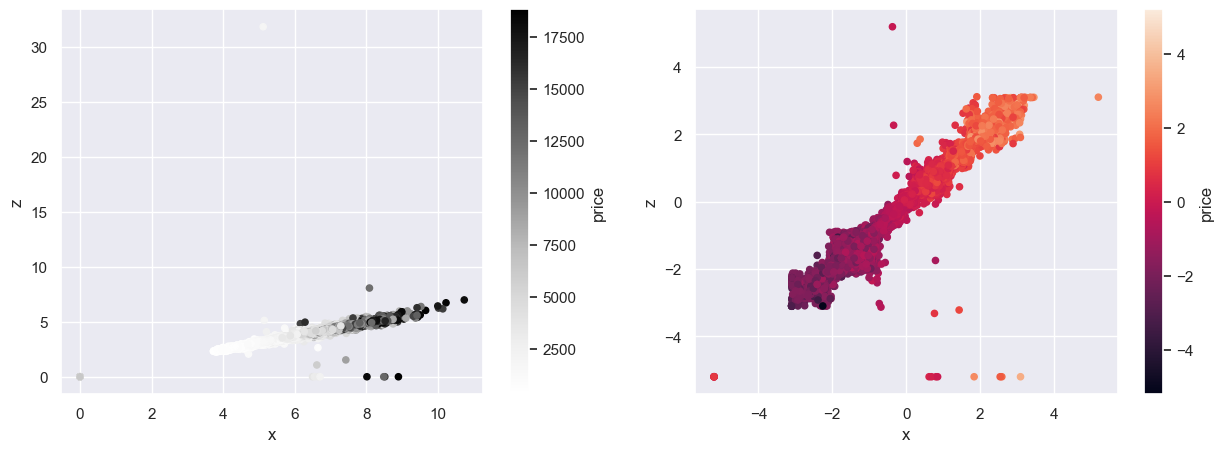

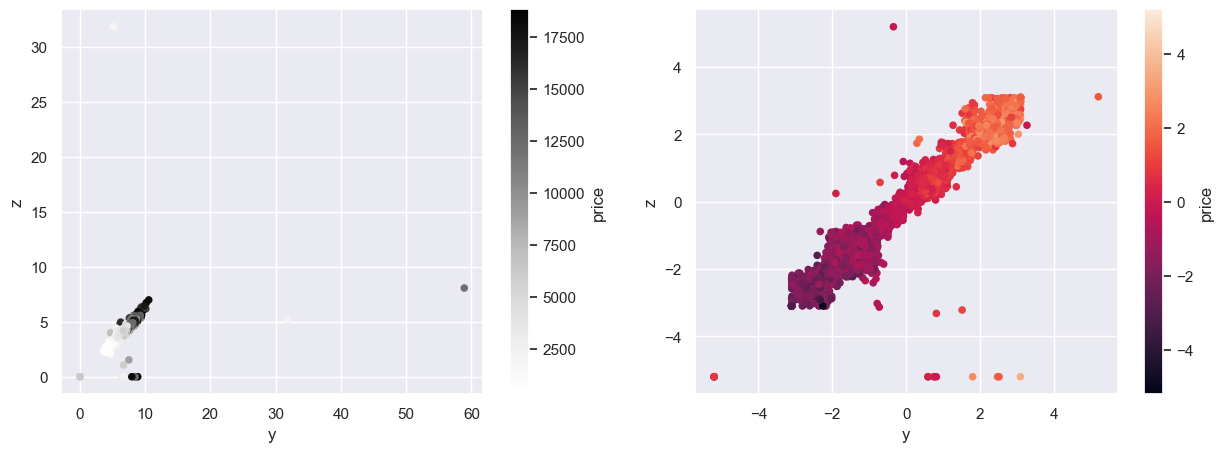

In [13]:
# Checking out all feature interactions and their relationship with the target variable

# Make white dots easier to see
sns.set_theme(style = 'darkgrid')

i_values = list(range(len(features) - 1))
j_values = list(range(len(features) - 1))
for i in i_values:
    for j in j_values:
        if i == j:
            continue
        else:
            fig, axs = plt.subplots(ncols = 2, figsize = (15, 5))
            training_data.plot.scatter(i, j, c = 9, ax = axs[0])
            transformed_data.plot.scatter(i, j, c = 9, ax = axs[1])
            plt.show()
    j_values.remove(i)

C:\Users\joshu\AppData\Local\Temp\ipykernel_24528\2224844515.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(method = method), annot = True, ax = axs[0])


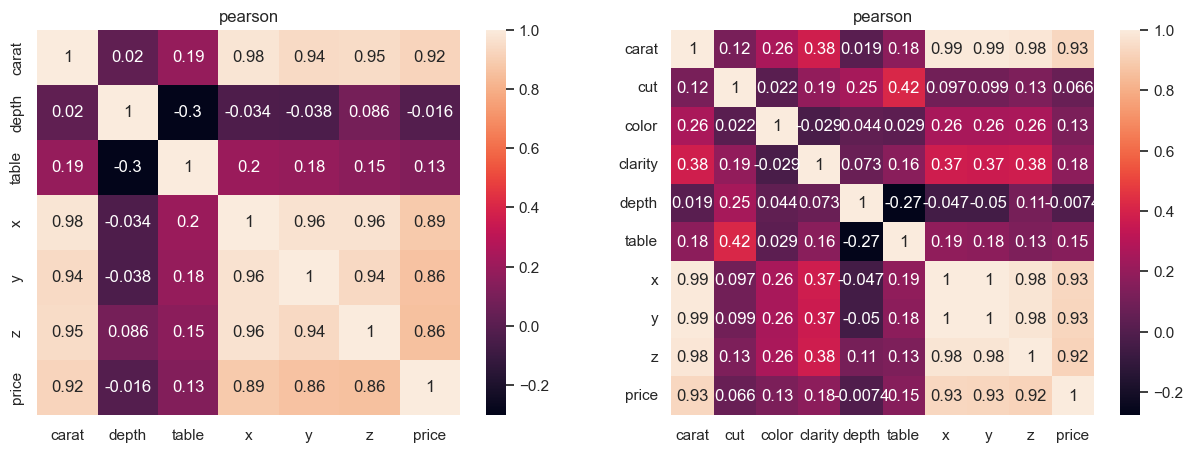

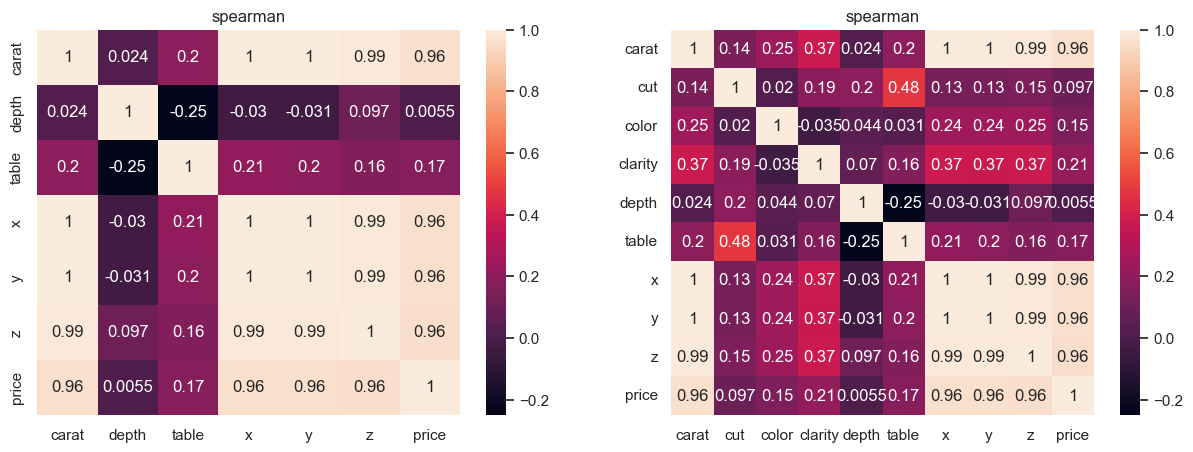

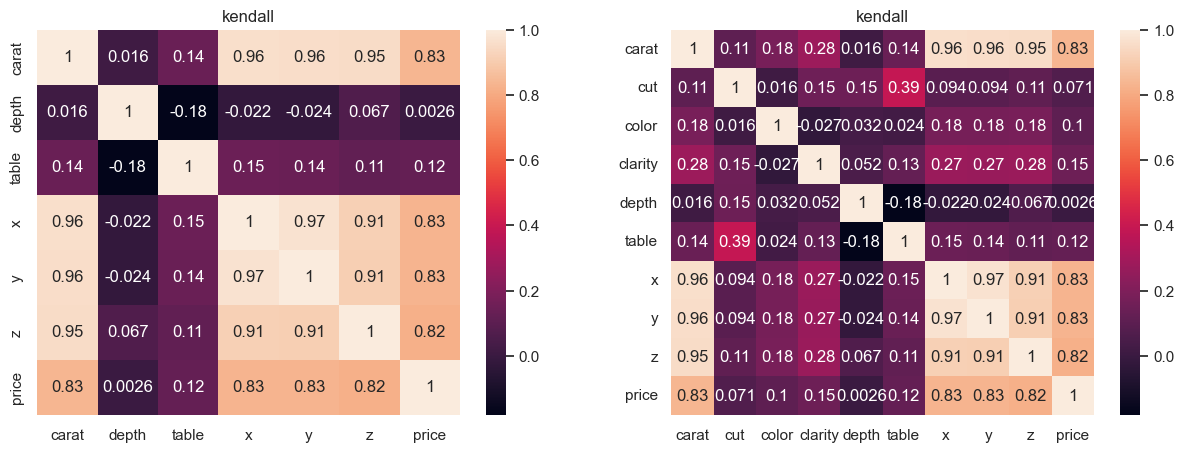

In [14]:
def heatmaps(data1, data2, method):
    fig, axs = plt.subplots(ncols = 2, figsize = (15, 5))
    sns.heatmap(data1.corr(method = method), annot = True, ax = axs[0])
    axs[0].set_title(method)
    sns.heatmap(data2.corr(method = method), annot = True, ax = axs[1])
    axs[1].set_title(method)
    plt.show()
methods = ['pearson', 'spearman', 'kendall']
for method in methods:
    heatmaps(training_data, transformed_data, method)